Connected to base (Python 3.11.7)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Leer los datos
df = pd.read_csv("../data/Compiled_ABS_2023.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Normalizar la variable 'Total Absent'
scaler = MinMaxScaler(feature_range=(0, 1))
df_normalized = scaler.fit_transform(df[['Total Absent']])

# Convertir de nuevo a DataFrame
df_normalized = pd.DataFrame(df_normalized, index=df.index, columns=['Total Absent'])

# Crear secuencias de datos
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 7  # Usar los últimos 7 días para predecir el siguiente día
X, y = create_sequences(df_normalized['Total Absent'].values, sequence_length)

# Dividir en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para ser compatible con LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Definir el modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(X_test, y_test)
print(f'Loss en el conjunto de prueba: {test_loss}')

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 248ms/step - loss: 0.1228 - val_loss: 0.0094
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0336 - val_loss: 0.0164
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0281 - val_loss: 0.0086
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0266 - val_loss: 0.0105
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0278 - val_loss: 0.0139
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0305 - val_loss: 0.0093
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0234 - val_loss: 0.0110
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0222 - val_loss: 0.0108
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0273 - val_loss: 0.0097
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0231 - val_loss: 0.0107
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0266 - val_loss: 0.0102
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0249 - val_loss: 0.0098

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 261ms/step - loss: 0.1430 - val_loss: 0.0163
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0330 - val_loss: 0.0152
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0334 - val_loss: 0.0086
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0326 - val_loss: 0.0084
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0275 - val_loss: 0.0083
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0288 - val_loss: 0.0086
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0265 - val_loss: 0.0083
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0300 - val_loss: 0.0088
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0302 - val_loss: 0.0096
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0288 - val_loss: 0.0089
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0247 - val_loss: 0.0098
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0242 - val_loss: 0.0093

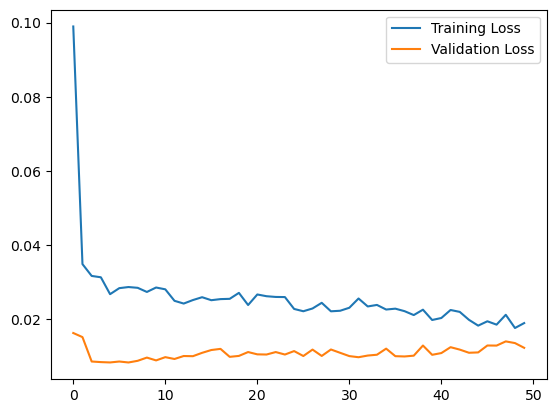

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0112
Test Loss: 0.01146695390343666
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 318ms/step


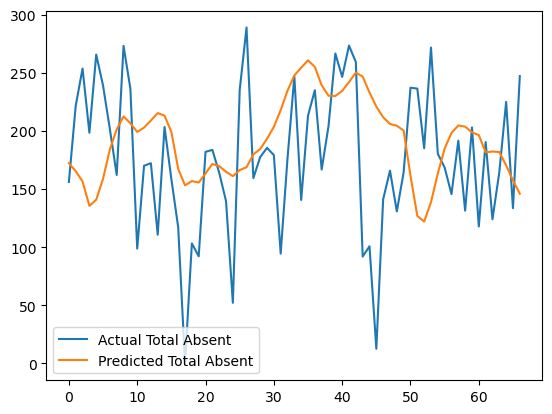

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Cargar y preprocesar los datos
data = pd.read_csv("../data/Compiled_ABS_2023.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.fillna(data.mean(), inplace=True)

# Normalizar los datos
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

# Crear secuencias de datos
def create_sequences(data, target_column, sequence_length=30):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i+sequence_length].values
        label = data.iloc[i+sequence_length][target_column]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

sequence_length = 30
target_column = 'Total Absent'
sequences, targets = create_sequences(scaled_data, target_column, sequence_length)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, shuffle=False)

# Construir el modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, scaled_data.shape[1])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Hacer predicciones
predictions = model.predict(X_test)

# Invertir la normalización para las predicciones y los valores reales
y_test_scaled = y_test.reshape(-1, 1)
predictions_scaled = predictions.reshape(-1, 1)

y_test_inverse = scaler.inverse_transform(np.hstack((np.zeros((y_test_scaled.shape[0], scaled_data.shape[1]-1)), y_test_scaled)))[:, -1]
predictions_inverse = scaler.inverse_transform(np.hstack((np.zeros((predictions_scaled.shape[0], scaled_data.shape[1]-1)), predictions_scaled)))[:, -1]

# Graficar las predicciones versus los valores reales
plt.plot(y_test_inverse, label='Actual Total Absent')
plt.plot(predictions_inverse, label='Predicted Total Absent')
plt.legend()
plt.show()

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 878ms/step - loss: 0.2710 - val_loss: 0.0209
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - loss: 0.0754 - val_loss: 0.0261
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - loss: 0.0554 - val_loss: 0.0137
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 0.0359 - val_loss: 0.0073
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - loss: 0.0326 - val_loss: 0.0073
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.0290 - val_loss: 0.0084
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - loss: 0.0323 - val_loss: 0.0122
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0296 - val_loss: 0.0103
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 0.0293 - val_loss: 0.0087
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 0.0316 - val_loss: 0.0102
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.0304 - val_loss: 0.0126
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - loss: 0.

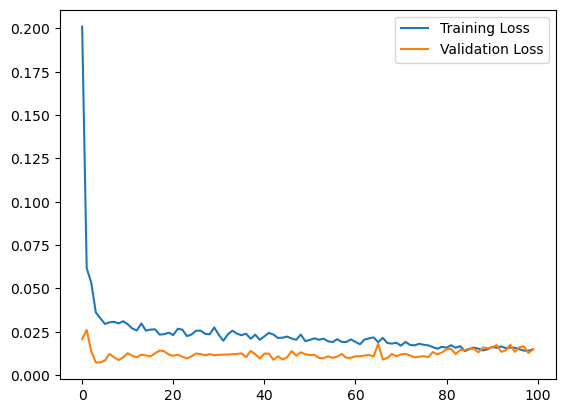

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0213
Test Loss: 0.02219821698963642
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 435ms/step


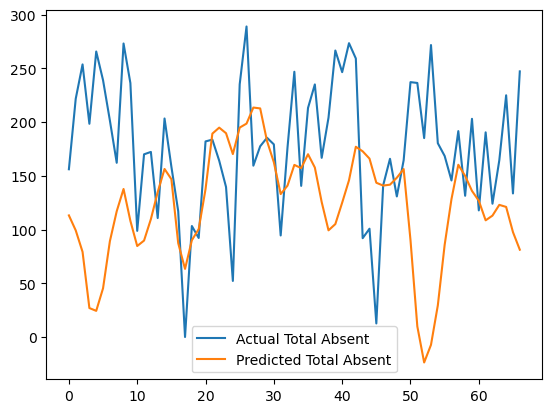

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Cargar y preprocesar los datos
data = pd.read_csv("../data/Compiled_ABS_2023.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.fillna(data.mean(), inplace=True)

# Normalizar los datos
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

# Crear secuencias de datos
def create_sequences(data, target_column, sequence_length=30):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i+sequence_length].values
        label = data.iloc[i+sequence_length][target_column]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

sequence_length = 30
target_column = 'Total Absent'
sequences, targets = create_sequences(scaled_data, target_column, sequence_length)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, shuffle=False)

# Construir el modelo LSTM
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(sequence_length, scaled_data.shape[1])))
model.add(Dropout(0.3))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Hacer predicciones
predictions = model.predict(X_test)

# Invertir la normalización para las predicciones y los valores reales
y_test_scaled = y_test.reshape(-1, 1)
predictions_scaled = predictions.reshape(-1, 1)

y_test_inverse = scaler.inverse_transform(np.hstack((np.zeros((y_test_scaled.shape[0], scaled_data.shape[1]-1)), y_test_scaled)))[:, -1]
predictions_inverse = scaler.inverse_transform(np.hstack((np.zeros((predictions_scaled.shape[0], scaled_data.shape[1]-1)), predictions_scaled)))[:, -1]

# Graficar las predicciones versus los valores reales
plt.plot(y_test_inverse, label='Actual Total Absent')
plt.plot(predictions_inverse, label='Predicted Total Absent')
plt.legend()
plt.show()

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - loss: 0.1531 - val_loss: 0.0162
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - loss: 0.0690 - val_loss: 0.0112
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - loss: 0.0301 - val_loss: 0.0117
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - loss: 0.0405 - val_loss: 0.0089
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step - loss: 0.0300 - val_loss: 0.0124
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 271ms/step - loss: 0.0297 - val_loss: 0.0077
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step - loss: 0.0269 - val_loss: 0.0073
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step - loss: 0.0265 - val_loss: 0.0091
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - loss: 0.0233 - val_loss: 0.0100
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 234ms/step - loss: 0.0262 - val_loss: 0.0088
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - loss: 0.0222 - val_loss: 0.0083
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - loss: 0.021

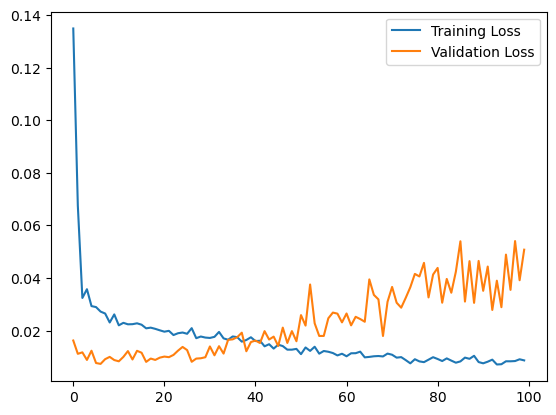

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0467
Test Loss: 0.04672056436538696
1/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000022F4E5B7A60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 901ms/step


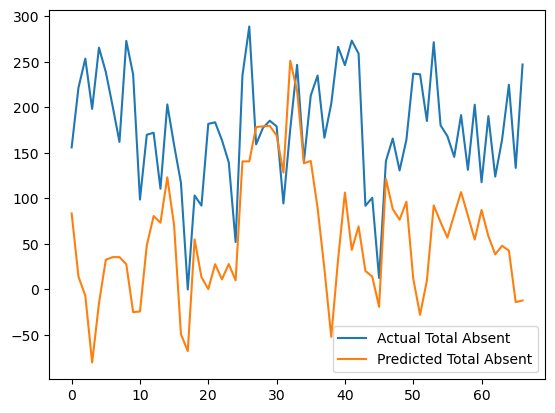

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_csv("../data/Compiled_ABS_2023.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.fillna(data.mean(), inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

# Create sequences of data
def create_sequences(data, target_column, sequence_length=30):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i+sequence_length].values
        label = data.iloc[i+sequence_length][target_column]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

sequence_length = 30
target_column = 'Total Absent'
sequences, targets = create_sequences(scaled_data, target_column, sequence_length)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, shuffle=False)

# Build the improved LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(100, return_sequences=True, input_shape=(sequence_length, scaled_data.shape[1]))))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.3))
model.add(Dense(1))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions
predictions = model.predict(X_test)

# Invert the normalization for the predictions and actual values
y_test_scaled = y_test.reshape(-1, 1)
predictions_scaled = predictions.reshape(-1, 1)

y_test_inverse = scaler.inverse_transform(np.hstack((np.zeros((y_test_scaled.shape[0], scaled_data.shape[1]-1)), y_test_scaled)))[:, -1]
predictions_inverse = scaler.inverse_transform(np.hstack((np.zeros((predictions_scaled.shape[0], scaled_data.shape[1]-1)), predictions_scaled)))[:, -1]

# Plot predictions versus actual values
plt.plot(y_test_inverse, label='Actual Total Absent')
plt.plot(predictions_inverse, label='Predicted Total Absent')
plt.legend()
plt.show()

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - loss: 3.2582 - val_loss: 0.0091
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step - loss: 2.6297 - val_loss: 0.0092
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step - loss: 2.0698 - val_loss: 0.0189
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step - loss: 1.6264 - val_loss: 0.0308
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step - loss: 1.3899 - val_loss: 0.0449
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step - loss: 1.4841 - val_loss: 0.0595
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step - loss: 1.2507 - val_loss: 0.0540
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 352ms/step - loss: 1.1047 - val_loss: 0.0634
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step - loss: 0.9078 - val_loss: 0.0761
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step - loss: 1.1140 - val_loss: 0.0774
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 290ms/step - loss: 1.0230 - val_loss: 0.0655
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 336ms/step - loss: 0.865

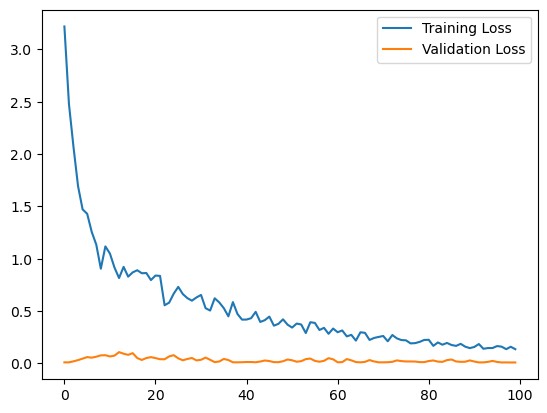

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0088
Test Loss: 0.008604217320680618
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step 


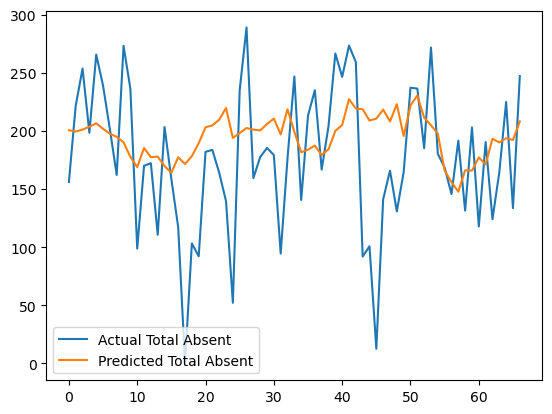

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Cargar y preprocesar los datos
data = pd.read_csv("../data/Compiled_ABS_2023.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.fillna(data.mean(), inplace=True)

# Normalizar los datos
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

# Crear secuencias de datos
def create_sequences(data, target_column, sequence_length=30):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i+sequence_length].values
        label = data.iloc[i+sequence_length][target_column]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

sequence_length = 30
target_column = 'Total Absent'
sequences, targets = create_sequences(scaled_data, target_column, sequence_length)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, shuffle=False)

# Construir el modelo LSTM mejorado
model = Sequential()
model.add(Bidirectional(LSTM(100, return_sequences=True, input_shape=(sequence_length, scaled_data.shape[1]))))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1))

# Compilar el modelo con un optimizador Adam con tasa de aprendizaje adaptativa
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Hacer predicciones
predictions = model.predict(X_test)

# Invertir la normalización para las predicciones y los valores reales
y_test_scaled = y_test.reshape(-1, 1)
predictions_scaled = predictions.reshape(-1, 1)

y_test_inverse = scaler.inverse_transform(np.hstack((np.zeros((y_test_scaled.shape[0], scaled_data.shape[1]-1)), y_test_scaled)))[:, -1]
predictions_inverse = scaler.inverse_transform(np.hstack((np.zeros((predictions_scaled.shape[0], scaled_data.shape[1]-1)), predictions_scaled)))[:, -1]

# Graficar las predicciones versus los valores reales
plt.plot(y_test_inverse, label='Actual Total Absent')
plt.plot(predictions_inverse, label='Predicted Total Absent')
plt.legend()
plt.show()

In [ ]:
print.head(data)

AttributeError: 'builtin_function_or_method' object has no attribute 'head'

In [ ]:
print(data.head())

   Total Scheduled   Total Absent    Open Time  AUX01 Paid Break  \
0       1384.416667    141.166667  1007.333333             76.75   
1       4205.000000    204.150000  2694.383333            248.50   
2       4653.500000    155.733333  2414.166667            280.50   
3       4845.333333    200.166667  2303.616667            289.50   
4       4677.250000    194.950000  2368.166667            277.00   

   AUX01 Unpaid Lunch  Meeting-Unavail-Paid  Client ACD - Coaching     Absent  \
0                 197             42.000000                  12.50  79.500000   
1                 553            175.833333                  60.00  72.000000   
2                 610            100.000000                  68.50   8.000000   
3                 628             78.333333                  63.25  31.833333   
4                 622            154.500000                  61.50  31.166667   

   Unconfirmed LOA        MIA  ...  Leave-Personal-Unp  Training-SITEL-Pd  \
0        23.833333  14.5833

Epoch 1/100


c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - loss: 3.2616 - val_loss: 0.0135
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 616ms/step - loss: 2.1589 - val_loss: 0.0087
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 612ms/step - loss: 2.0770 - val_loss: 0.0167
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 385ms/step - loss: 1.8782 - val_loss: 0.0135
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 316ms/step - loss: 1.8716 - val_loss: 0.0390
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 384ms/step - loss: 1.5189 - val_loss: 0.0809
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - loss: 1.3732 - val_loss: 0.0860
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 291ms/step - loss: 0.9848 - val_loss: 0.0854
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step - loss: 1.2217 - val_loss: 0.1072
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 258ms/step - loss: 1.0713 - val_loss: 0.1319
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 411ms/step - loss: 0.8356 - val_loss: 0.1620
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step - loss: 1.1129 - val_loss

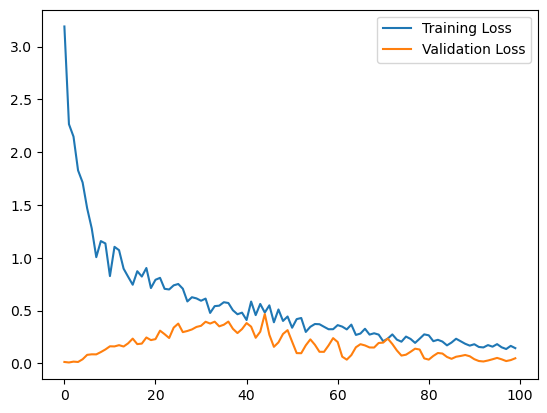

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0708
Test Loss: 0.0685107633471489
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step


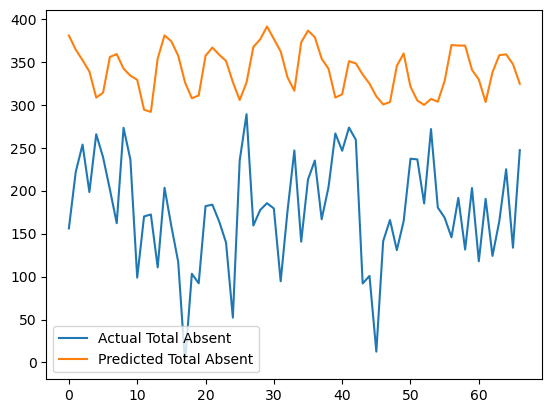

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Cargar y preprocesar los datos
data = pd.read_csv("../data/Compiled_ABS_2023.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.fillna(data.mean(), inplace=True)

# Normalizar los datos
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

# Crear secuencias de datos
def create_sequences(data, target_column, sequence_length=30):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i+sequence_length].values
        label = data.iloc[i+sequence_length][target_column]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

sequence_length = 30
target_column = 'Total Absent'
sequences, targets = create_sequences(scaled_data, target_column, sequence_length)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, shuffle=False)

# Construir el modelo LSTM mejorado
model = Sequential()
model.add(Bidirectional(LSTM(100, return_sequences=True, input_shape=(sequence_length, scaled_data.shape[1]))))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1))

# Compilar el modelo con un optimizador Adam con tasa de aprendizaje adaptativa
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Hacer predicciones
predictions = model.predict(X_test)

# Invertir la normalización para las predicciones y los valores reales
y_test_scaled = y_test.reshape(-1, 1)
predictions_scaled = predictions.reshape(-1, 1)

y_test_inverse = scaler.inverse_transform(np.hstack((np.zeros((y_test_scaled.shape[0], scaled_data.shape[1]-1)), y_test_scaled)))[:, -1]
predictions_inverse = scaler.inverse_transform(np.hstack((np.zeros((predictions_scaled.shape[0], scaled_data.shape[1]-1)), predictions_scaled)))[:, -1]

# Graficar las predicciones versus los valores reales
plt.plot(y_test_inverse, label='Actual Total Absent')
plt.plot(predictions_inverse, label='Predicted Total Absent')
plt.legend()
plt.show()

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 451ms/step - loss: 2.3067 - val_loss: 0.0363
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 2.1741 - val_loss: 0.0342
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 1.5708 - val_loss: 0.0185
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 1.3882 - val_loss: 0.0126
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 1.2116 - val_loss: 0.0130
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - loss: 1.1352 - val_loss: 0.0209
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - loss: 1.0291 - val_loss: 0.0362
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step - loss: 1.2658 - val_loss: 0.0466
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - loss: 1.1094 - val_loss: 0.0705
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - loss: 0.8846 - val_loss: 0.0783
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - loss: 1.0291 - val_loss: 0.0820
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - loss: 0.94

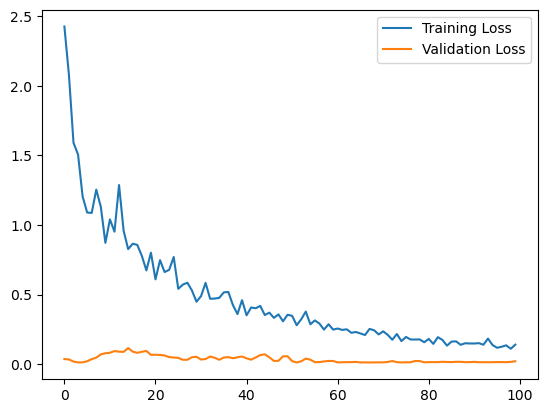

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0206
Test Loss: 0.02257755771279335
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 596ms/step


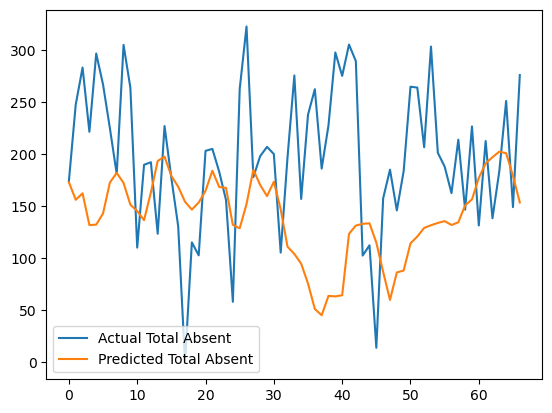

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Cargar y preprocesar los datos
data = pd.read_csv("../data/Compiled_ABS_2023.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.fillna(data.mean(), inplace=True)

# Normalizar los datos
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

# Crear secuencias de datos
def create_sequences(data, target_column, sequence_length=30):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i+sequence_length].values
        label = data.iloc[i+sequence_length][target_column]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

sequence_length = 30
target_column = 'Total Absent'
sequences, targets = create_sequences(scaled_data, target_column, sequence_length)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, shuffle=False)

# Construir el modelo LSTM mejorado
model = Sequential()
model.add(Bidirectional(LSTM(100, return_sequences=True, input_shape=(sequence_length, scaled_data.shape[1]))))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1))

# Compilar el modelo con un optimizador Adam con tasa de aprendizaje adaptativa
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Hacer predicciones
predictions = model.predict(X_test)

# Invertir la normalización para las predicciones y los valores reales
y_test_scaled = y_test.reshape(-1, 1)
predictions_scaled = predictions.reshape(-1, 1)

y_test_inverse = scaler.inverse_transform(np.hstack((np.zeros((y_test_scaled.shape[0], scaled_data.shape[1]-1)), y_test_scaled)))[:, -1]
predictions_inverse = scaler.inverse_transform(np.hstack((np.zeros((predictions_scaled.shape[0], scaled_data.shape[1]-1)), predictions_scaled)))[:, -1]

# Graficar las predicciones versus los valores reales
plt.plot(y_test_inverse, label='Actual Total Absent')
plt.plot(predictions_inverse, label='Predicted Total Absent')
plt.legend()
plt.show()

Epoch 1/100


c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - loss: 2.2609 - val_loss: 0.1640
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 292ms/step - loss: 2.1572 - val_loss: 0.1315
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - loss: 1.4677 - val_loss: 0.1384
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - loss: 1.7446 - val_loss: 0.0999
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - loss: 1.4515 - val_loss: 0.0730
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - loss: 1.2882 - val_loss: 0.0506
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - loss: 0.8803 - val_loss: 0.0285
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - loss: 1.0701 - val_loss: 0.0161
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - loss: 0.8179 - val_loss: 0.0116
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - loss: 0.8186 - val_loss: 0.0099
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - loss: 0.9497 - val_loss: 0.0103
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step - loss: 0.9558 - val_loss

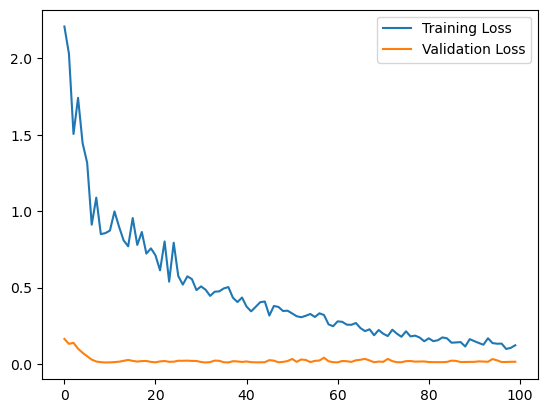

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0126
Test Loss: 0.012257804162800312
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 698ms/step


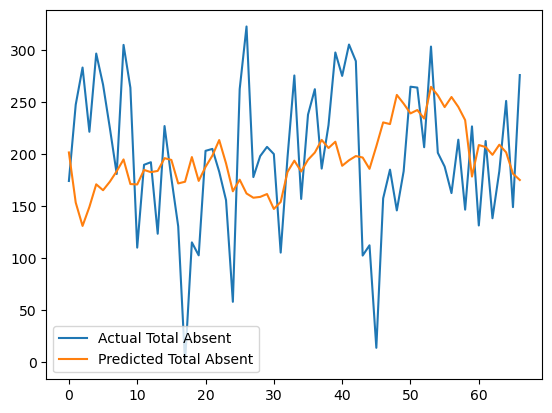

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Cargar y preprocesar los datos
data = pd.read_csv("../data/Compiled_ABS_2023.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.fillna(data.mean(), inplace=True)

# Normalizar los datos
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

# Crear secuencias de datos
def create_sequences(data, target_column, sequence_length=30):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i+sequence_length].values
        label = data.iloc[i+sequence_length][target_column]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

sequence_length = 30
target_column = 'Total Absent'
sequences, targets = create_sequences(scaled_data, target_column, sequence_length)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, shuffle=False)

# Construir el modelo LSTM mejorado
model = Sequential()
model.add(Bidirectional(LSTM(100, return_sequences=True, input_shape=(sequence_length, scaled_data.shape[1]))))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1))

# Compilar el modelo con un optimizador Adam con tasa de aprendizaje adaptativa
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Hacer predicciones
predictions = model.predict(X_test)

# Invertir la normalización para las predicciones y los valores reales
y_test_scaled = y_test.reshape(-1, 1)
predictions_scaled = predictions.reshape(-1, 1)

y_test_inverse = scaler.inverse_transform(np.hstack((np.zeros((y_test_scaled.shape[0], scaled_data.shape[1]-1)), y_test_scaled)))[:, -1]
predictions_inverse = scaler.inverse_transform(np.hstack((np.zeros((predictions_scaled.shape[0], scaled_data.shape[1]-1)), predictions_scaled)))[:, -1]

# Graficar las predicciones versus los valores reales
plt.plot(y_test_inverse, label='Actual Total Absent')
plt.plot(predictions_inverse, label='Predicted Total Absent')
plt.legend()
plt.show()

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 549ms/step - loss: 0.3373 - val_loss: 0.1267
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.1771 - val_loss: 0.0105
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 0.0633 - val_loss: 0.0219
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0734 - val_loss: 0.0105
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0445 - val_loss: 0.0170
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0519 - val_loss: 0.0107
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0401 - val_loss: 0.0126
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0407 - val_loss: 0.0134
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0375 - val_loss: 0.0103
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0336 - val_loss: 0.0110
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0365 - val_loss: 0.0111
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0370 - va

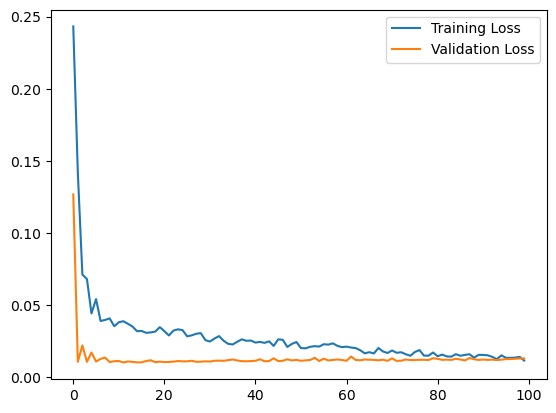

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0209
Test Loss: 0.02055915631353855
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 441ms/step


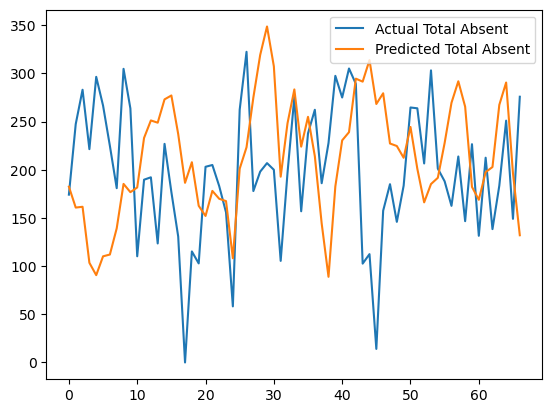

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
import matplotlib.pyplot as plt

# Cargar y preprocesar los datos
data = pd.read_csv("../data/Compiled_ABS_2023.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.fillna(data.mean(), inplace=True)

# Normalizar los datos
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

# Crear secuencias de datos
def create_sequences(data, target_column, sequence_length=30):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i+sequence_length].values
        label = data.iloc[i+sequence_length][target_column]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

sequence_length = 30
target_column = 'Total Absent'
sequences, targets = create_sequences(scaled_data, target_column, sequence_length)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, shuffle=False)

# Construir el modelo GRU
model = Sequential()
model.add(GRU(100, return_sequences=True, input_shape=(sequence_length, scaled_data.shape[1])))
model.add(Dropout(0.3))
model.add(GRU(100, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Hacer predicciones
predictions = model.predict(X_test)

# Invertir la normalización para las predicciones y los valores reales
y_test_scaled = y_test.reshape(-1, 1)
predictions_scaled = predictions.reshape(-1, 1)

y_test_inverse = scaler.inverse_transform(np.hstack((np.zeros((y_test_scaled.shape[0], scaled_data.shape[1]-1)), y_test_scaled)))[:, -1]
predictions_inverse = scaler.inverse_transform(np.hstack((np.zeros((predictions_scaled.shape[0], scaled_data.shape[1]-1)), predictions_scaled)))[:, -1]

# Graficar las predicciones versus los valores reales
plt.plot(y_test_inverse, label='Actual Total Absent')
plt.plot(predictions_inverse, label='Predicted Total Absent')
plt.legend()
plt.show()

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 713ms/step


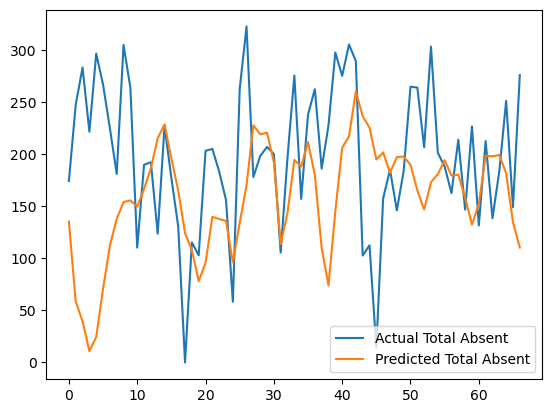

(9380.69475326012, 96.85398677008665)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
import matplotlib.pyplot as plt

# Cargar y preprocesar los datos
data = pd.read_csv("../data/Compiled_ABS_2023.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.fillna(data.mean(), inplace=True)

# Normalizar los datos
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

# Crear secuencias de datos
def create_sequences(data, target_column, sequence_length=30):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i+sequence_length].values
        label = data.iloc[i+sequence_length][target_column]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

sequence_length = 30
target_column = 'Total Absent'
sequences, targets = create_sequences(scaled_data, target_column, sequence_length)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, shuffle=False)

# Construir el modelo GRU
gru_model = Sequential()
gru_model.add(GRU(100, return_sequences=True, input_shape=(sequence_length, scaled_data.shape[1])))
gru_model.add(Dropout(0.3))
gru_model.add(GRU(100, return_sequences=False))
gru_model.add(Dropout(0.3))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
gru_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=0)

# Evaluar el modelo
predictions = gru_model.predict(X_test)

# Invertir la normalización para las predicciones y los valores reales
y_test_scaled = y_test.reshape(-1, 1)
predictions_scaled = predictions.reshape(-1, 1)

y_test_inverse = scaler.inverse_transform(np.hstack((np.zeros((y_test_scaled.shape[0], scaled_data.shape[1]-1)), y_test_scaled)))[:, -1]
predictions_inverse = scaler.inverse_transform(np.hstack((np.zeros((predictions_scaled.shape[0], scaled_data.shape[1]-1)), predictions_scaled)))[:, -1]

# Calcular MSE y RMSE
mse = mean_squared_error(y_test_inverse, predictions_inverse)
rmse = np.sqrt(mse)

# Graficar las predicciones versus los valores reales
plt.plot(y_test_inverse, label='Actual Total Absent')
plt.plot(predictions_inverse, label='Predicted Total Absent')
plt.legend()
plt.show()

mse, rmse

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step  


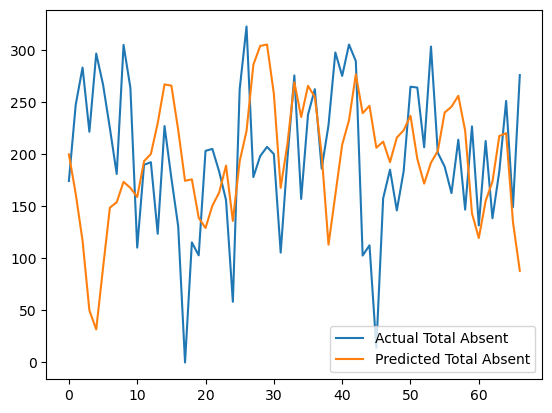

(8266.433494469646, 90.91992902807198)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
import matplotlib.pyplot as plt

# Cargar y preprocesar los datos
data = pd.read_csv("../data/Compiled_ABS_2023.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.fillna(data.mean(), inplace=True)

# Normalizar los datos
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

# Crear secuencias de datos
def create_sequences(data, target_column, sequence_length=30):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i+sequence_length].values
        label = data.iloc[i+sequence_length][target_column]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

sequence_length = 30
target_column = 'Total Absent'
sequences, targets = create_sequences(scaled_data, target_column, sequence_length)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, shuffle=False)

# Construir el modelo GRU
gru_model = Sequential()
gru_model.add(GRU(100, return_sequences=True, input_shape=(sequence_length, scaled_data.shape[1])))
gru_model.add(Dropout(0.3))
gru_model.add(GRU(100, return_sequences=False))
gru_model.add(Dropout(0.3))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
gru_model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=0)

# Evaluar el modelo
predictions = gru_model.predict(X_test)

# Invertir la normalización para las predicciones y los valores reales
y_test_scaled = y_test.reshape(-1, 1)
predictions_scaled = predictions.reshape(-1, 1)

y_test_inverse = scaler.inverse_transform(np.hstack((np.zeros((y_test_scaled.shape[0], scaled_data.shape[1]-1)), y_test_scaled)))[:, -1]
predictions_inverse = scaler.inverse_transform(np.hstack((np.zeros((predictions_scaled.shape[0], scaled_data.shape[1]-1)), predictions_scaled)))[:, -1]

# Calcular MSE y RMSE
mse = mean_squared_error(y_test_inverse, predictions_inverse)
rmse = np.sqrt(mse)

# Graficar las predicciones versus los valores reales
plt.plot(y_test_inverse, label='Actual Total Absent')
plt.plot(predictions_inverse, label='Predicted Total Absent')
plt.legend()
plt.show()

mse, rmse

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 793ms/step


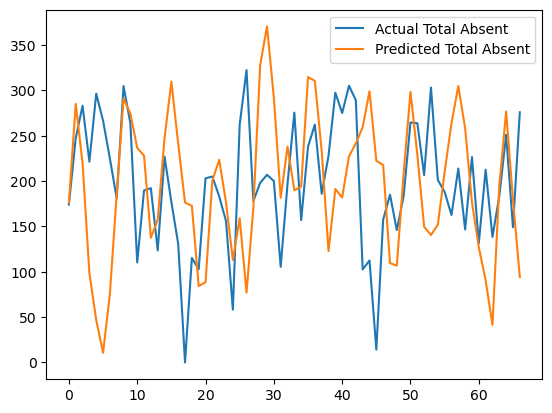

(10542.294734203, 102.67567742266422)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
import matplotlib.pyplot as plt

# Cargar y preprocesar los datos
data = pd.read_csv("../data/Compiled_ABS_2023.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.fillna(data.mean(), inplace=True)

# Normalizar los datos
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

# Crear secuencias de datos
def create_sequences(data, target_column, sequence_length=30):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i+sequence_length].values
        label = data.iloc[i+sequence_length][target_column]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

sequence_length = 30
target_column = 'Total Absent'
sequences, targets = create_sequences(scaled_data, target_column, sequence_length)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, shuffle=False)

# Construir el modelo GRU
gru_model = Sequential()
gru_model.add(GRU(100, return_sequences=True, input_shape=(sequence_length, scaled_data.shape[1])))
gru_model.add(Dropout(0.3))
gru_model.add(GRU(100, return_sequences=False))
gru_model.add(Dropout(0.3))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
gru_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=0)

# Evaluar el modelo
predictions = gru_model.predict(X_test)

# Invertir la normalización para las predicciones y los valores reales
y_test_scaled = y_test.reshape(-1, 1)
predictions_scaled = predictions.reshape(-1, 1)

y_test_inverse = scaler.inverse_transform(np.hstack((np.zeros((y_test_scaled.shape[0], scaled_data.shape[1]-1)), y_test_scaled)))[:, -1]
predictions_inverse = scaler.inverse_transform(np.hstack((np.zeros((predictions_scaled.shape[0], scaled_data.shape[1]-1)), predictions_scaled)))[:, -1]

# Calcular MSE y RMSE
mse = mean_squared_error(y_test_inverse, predictions_inverse)
rmse = np.sqrt(mse)

# Graficar las predicciones versus los valores reales
plt.plot(y_test_inverse, label='Actual Total Absent')
plt.plot(predictions_inverse, label='Predicted Total Absent')
plt.legend()
plt.show()

mse, rmse

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 725ms/step


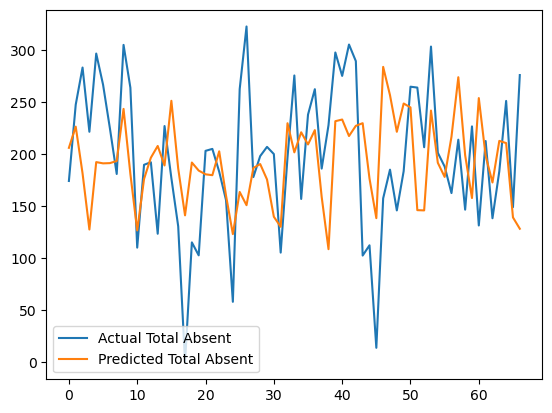

CNN-LSTM Model - MSE: 5044.228772083296, RMSE: 71.0227341918297


In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, RepeatVector, LSTM, Dense, Dropout

# Definir el modelo CNN-LSTM
cnn_lstm_model = Sequential()
cnn_lstm_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, scaled_data.shape[1])))
cnn_lstm_model.add(MaxPooling1D(pool_size=2))
cnn_lstm_model.add(Flatten())
cnn_lstm_model.add(RepeatVector(1))
cnn_lstm_model.add(LSTM(100, activation='relu', return_sequences=True))
cnn_lstm_model.add(Dropout(0.3))
cnn_lstm_model.add(LSTM(100, activation='relu'))
cnn_lstm_model.add(Dropout(0.3))
cnn_lstm_model.add(Dense(1))
cnn_lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
cnn_lstm_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=0)

# Evaluar el modelo
predictions = cnn_lstm_model.predict(X_test)

# Invertir la normalización para las predicciones y los valores reales
y_test_scaled = y_test.reshape(-1, 1)
predictions_scaled = predictions.reshape(-1, 1)

y_test_inverse = scaler.inverse_transform(np.hstack((np.zeros((y_test_scaled.shape[0], scaled_data.shape[1]-1)), y_test_scaled)))[:, -1]
predictions_inverse = scaler.inverse_transform(np.hstack((np.zeros((predictions_scaled.shape[0], scaled_data.shape[1]-1)), predictions_scaled)))[:, -1]

# Calcular MSE y RMSE
mse = mean_squared_error(y_test_inverse, predictions_inverse)
rmse = np.sqrt(mse)

# Graficar las predicciones versus los valores reales
plt.plot(y_test_inverse, label='Actual Total Absent')
plt.plot(predictions_inverse, label='Predicted Total Absent')
plt.legend()
plt.show()

print(f'CNN-LSTM Model - MSE: {mse}, RMSE: {rmse}')

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step


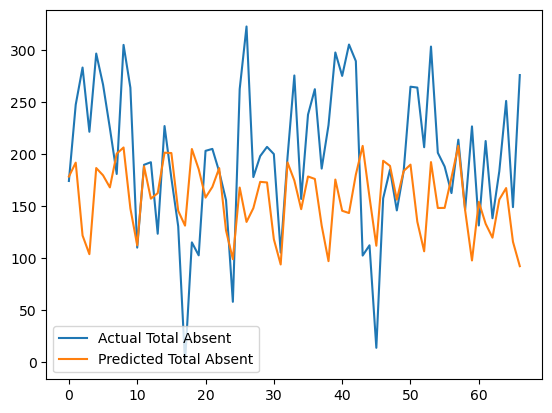

CNN-LSTM Model - MSE: 6498.052058298984, RMSE: 80.61049595616556


In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, RepeatVector, LSTM, Dense, Dropout

# Definir el modelo CNN-LSTM
cnn_lstm_model = Sequential()
cnn_lstm_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, scaled_data.shape[1])))
cnn_lstm_model.add(MaxPooling1D(pool_size=2))
cnn_lstm_model.add(Flatten())
cnn_lstm_model.add(RepeatVector(1))
cnn_lstm_model.add(LSTM(100, activation='relu', return_sequences=True))
cnn_lstm_model.add(Dropout(0.3))
cnn_lstm_model.add(LSTM(100, activation='relu'))
cnn_lstm_model.add(Dropout(0.3))
cnn_lstm_model.add(Dense(1))
cnn_lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
cnn_lstm_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=0)

# Evaluar el modelo
predictions = cnn_lstm_model.predict(X_test)

# Invertir la normalización para las predicciones y los valores reales
y_test_scaled = y_test.reshape(-1, 1)
predictions_scaled = predictions.reshape(-1, 1)

y_test_inverse = scaler.inverse_transform(np.hstack((np.zeros((y_test_scaled.shape[0], scaled_data.shape[1]-1)), y_test_scaled)))[:, -1]
predictions_inverse = scaler.inverse_transform(np.hstack((np.zeros((predictions_scaled.shape[0], scaled_data.shape[1]-1)), predictions_scaled)))[:, -1]

# Calcular MSE y RMSE
mse = mean_squared_error(y_test_inverse, predictions_inverse)
rmse = np.sqrt(mse)

# Graficar las predicciones versus los valores reales
plt.plot(y_test_inverse, label='Actual Total Absent')
plt.plot(predictions_inverse, label='Predicted Total Absent')
plt.legend()
plt.show()

print(f'CNN-LSTM Model - MSE: {mse}, RMSE: {rmse}')

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 344ms/step


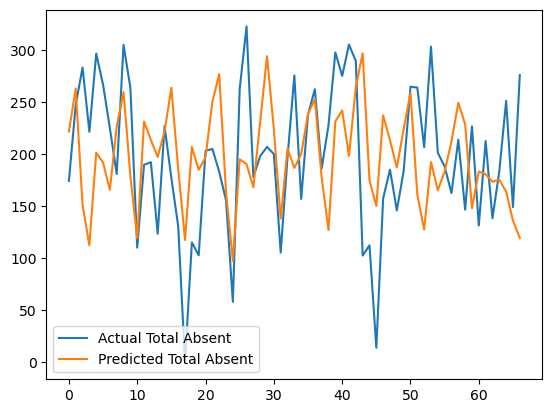

CNN-LSTM Model - MSE: 5159.643725156887, RMSE: 71.83066006349159


In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, RepeatVector, LSTM, Dense, Dropout

# Definir el modelo CNN-LSTM
cnn_lstm_model = Sequential()
cnn_lstm_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, scaled_data.shape[1])))
cnn_lstm_model.add(MaxPooling1D(pool_size=2))
cnn_lstm_model.add(Flatten())
cnn_lstm_model.add(RepeatVector(1))
cnn_lstm_model.add(LSTM(100, activation='relu', return_sequences=True))
cnn_lstm_model.add(Dropout(0.3))
cnn_lstm_model.add(LSTM(100, activation='relu'))
cnn_lstm_model.add(Dropout(0.3))
cnn_lstm_model.add(Dense(1))
cnn_lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
cnn_lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluar el modelo
predictions = cnn_lstm_model.predict(X_test)

# Invertir la normalización para las predicciones y los valores reales
y_test_scaled = y_test.reshape(-1, 1)
predictions_scaled = predictions.reshape(-1, 1)

y_test_inverse = scaler.inverse_transform(np.hstack((np.zeros((y_test_scaled.shape[0], scaled_data.shape[1]-1)), y_test_scaled)))[:, -1]
predictions_inverse = scaler.inverse_transform(np.hstack((np.zeros((predictions_scaled.shape[0], scaled_data.shape[1]-1)), predictions_scaled)))[:, -1]

# Calcular MSE y RMSE
mse = mean_squared_error(y_test_inverse, predictions_inverse)
rmse = np.sqrt(mse)

# Graficar las predicciones versus los valores reales
plt.plot(y_test_inverse, label='Actual Total Absent')
plt.plot(predictions_inverse, label='Predicted Total Absent')
plt.legend()
plt.show()

print(f'CNN-LSTM Model - MSE: {mse}, RMSE: {rmse}')

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 325ms/step


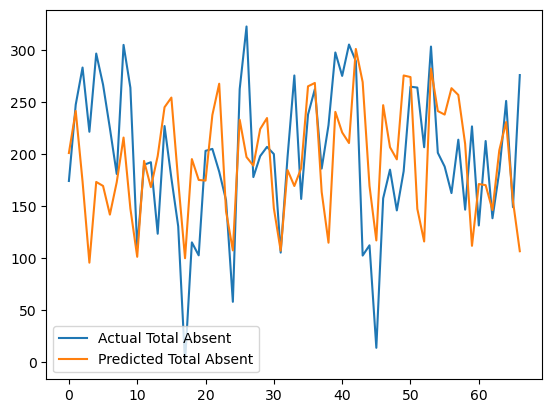

CNN-LSTM Model - MSE: 5082.741176315566, RMSE: 71.29334594697858


In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, RepeatVector, LSTM, Dense, Dropout

# Definir el modelo CNN-LSTM
cnn_lstm_model = Sequential()
cnn_lstm_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, scaled_data.shape[1])))
cnn_lstm_model.add(MaxPooling1D(pool_size=2))
cnn_lstm_model.add(Flatten())
cnn_lstm_model.add(RepeatVector(1))
cnn_lstm_model.add(LSTM(100, activation='relu', return_sequences=True))
cnn_lstm_model.add(Dropout(0.3))
cnn_lstm_model.add(LSTM(100, activation='relu'))
cnn_lstm_model.add(Dropout(0.3))
cnn_lstm_model.add(Dense(1))
cnn_lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
cnn_lstm_model.fit(X_train, y_train, epochs=150, batch_size=50, validation_split=0.2, verbose=0)

# Evaluar el modelo
predictions = cnn_lstm_model.predict(X_test)

# Invertir la normalización para las predicciones y los valores reales
y_test_scaled = y_test.reshape(-1, 1)
predictions_scaled = predictions.reshape(-1, 1)

y_test_inverse = scaler.inverse_transform(np.hstack((np.zeros((y_test_scaled.shape[0], scaled_data.shape[1]-1)), y_test_scaled)))[:, -1]
predictions_inverse = scaler.inverse_transform(np.hstack((np.zeros((predictions_scaled.shape[0], scaled_data.shape[1]-1)), predictions_scaled)))[:, -1]

# Calcular MSE y RMSE
mse = mean_squared_error(y_test_inverse, predictions_inverse)
rmse = np.sqrt(mse)

# Graficar las predicciones versus los valores reales
plt.plot(y_test_inverse, label='Actual Total Absent')
plt.plot(predictions_inverse, label='Predicted Total Absent')
plt.legend()
plt.show()

print(f'CNN-LSTM Model - MSE: {mse}, RMSE: {rmse}')

            Total Scheduled   Total Absent    Open Time  AUX01 Paid Break  \
Date                                                                        
2023-01-01       1384.416667    141.166667  1007.333333             76.75   
2023-01-02       4205.000000    204.150000  2694.383333            248.50   
2023-01-03       4653.500000    155.733333  2414.166667            280.50   
2023-01-04       4845.333333    200.166667  2303.616667            289.50   
2023-01-05       4677.250000    194.950000  2368.166667            277.00   

            AUX01 Unpaid Lunch  Meeting-Unavail-Paid  Client ACD - Coaching  \
Date                                                                          
2023-01-01                 197             42.000000                  12.50   
2023-01-02                 553            175.833333                  60.00   
2023-01-03                 610            100.000000                  68.50   
2023-01-04                 628             78.333333             

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - loss: 0.2341 - val_loss: 0.0209
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0598 - val_loss: 0.0384
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0458 - val_loss: 0.0141
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0290 - val_loss: 0.0110
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0331 - val_loss: 0.0171
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0309 - val_loss: 0.0151
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0314 - val_loss: 0.0129
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0281 - val_loss: 0.0146
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0298 - val_loss: 0.0129
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0287 - val_loss: 0.0134
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0280 - val_loss: 0.0137
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0305 - val_loss: 0.0135
Epoch 13/50

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2438 - val_loss: 0.0226
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0501 - val_loss: 0.0125
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0315 - val_loss: 0.0176
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0287 - val_loss: 0.0116
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0241 - val_loss: 0.0104
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0246 - val_loss: 0.0108
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0243 - val_loss: 0.0118
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0256 - val_loss: 0.0113
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0251 - val_loss: 0.0107
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0229 - val_loss: 0.0113
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0241 - val_loss: 0.0111
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0244 - val_loss: 0.0109
Epoch 13/50
9/9 ━━━━━━━

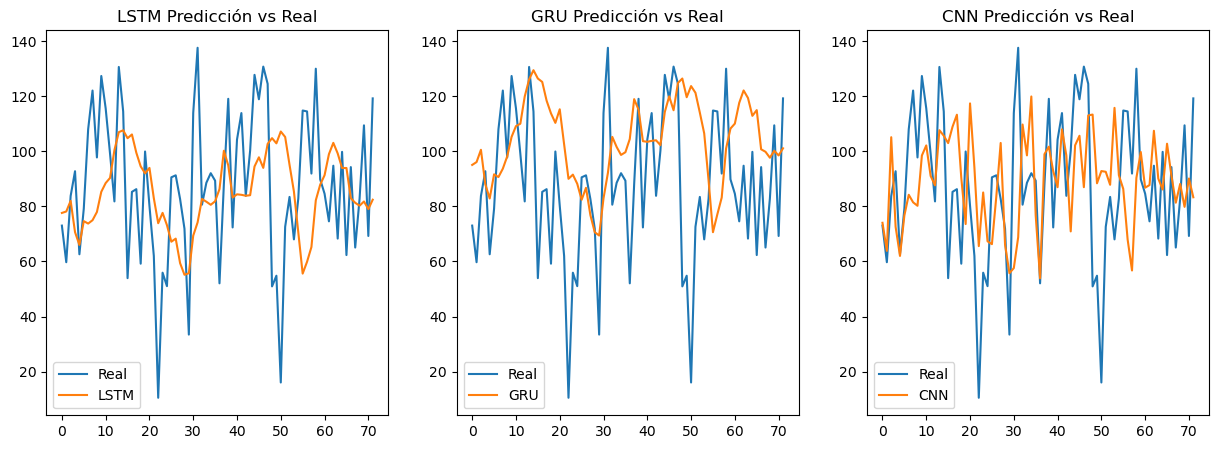

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt

# Cargar los datos
file_path = '../data/Compiled_ABS_2023.csv'  # Reemplaza con la ruta correcta
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Inspeccionar los datos
print(df.head())
print(df.describe())
print(df.info())

# Normalizar la variable 'Total Absent'
scaler = MinMaxScaler(feature_range=(0, 1))
df_normalized = scaler.fit_transform(df[['Total Absent']])

# Convertir de nuevo a DataFrame
df_normalized = pd.DataFrame(df_normalized, index=df.index, columns=['Total Absent'])

# Crear secuencias de datos (ventanas deslizantes)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 7  # Usar los últimos 7 días para predecir el siguiente día
X, y = create_sequences(df_normalized['Total Absent'].values, sequence_length)

# Dividir en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para ser compatible con LSTM/GRU/CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Función para definir y entrenar un modelo LSTM
def train_lstm(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
    return model

# Función para definir y entrenar un modelo GRU
def train_gru(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(GRU(50, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(Dropout(0.2))
    model.add(GRU(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
    return model

# Función para definir y entrenar un modelo CNN 1D
def train_cnn(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
    return model

# Entrenar y evaluar los modelos
lstm_model = train_lstm(X_train, y_train, X_test, y_test)
gru_model = train_gru(X_train, y_train, X_test, y_test)
cnn_model = train_cnn(X_train, y_train, X_test, y_test)

# Hacer predicciones con los modelos
y_pred_lstm = scaler.inverse_transform(lstm_model.predict(X_test))
y_pred_gru = scaler.inverse_transform(gru_model.predict(X_test))
y_pred_cnn = scaler.inverse_transform(cnn_model.predict(X_test))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular el MSE para cada modelo
mse_lstm = mean_squared_error(y_test_rescaled, y_pred_lstm)
mse_gru = mean_squared_error(y_test_rescaled, y_pred_gru)
mse_cnn = mean_squared_error(y_test_rescaled, y_pred_cnn)

print(f'MSE LSTM: {mse_lstm}')
print(f'MSE GRU: {mse_gru}')
print(f'MSE CNN: {mse_cnn}')

# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_lstm, label='LSTM')
plt.title('LSTM Predicción vs Real')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_gru, label='GRU')
plt.title('GRU Predicción vs Real')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_cnn, label='CNN')
plt.title('CNN Predicción vs Real')
plt.legend()

plt.show()

            Total Scheduled   Total Absent    Open Time  AUX01 Paid Break  \
Date                                                                        
2023-01-01       1384.416667    141.166667  1007.333333             76.75   
2023-01-02       4205.000000    204.150000  2694.383333            248.50   
2023-01-03       4653.500000    155.733333  2414.166667            280.50   
2023-01-04       4845.333333    200.166667  2303.616667            289.50   
2023-01-05       4677.250000    194.950000  2368.166667            277.00   

            AUX01 Unpaid Lunch  Meeting-Unavail-Paid  Client ACD - Coaching  \
Date                                                                          
2023-01-01                 197             42.000000                  12.50   
2023-01-02                 553            175.833333                  60.00   
2023-01-03                 610            100.000000                  68.50   
2023-01-04                 628             78.333333             

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - loss: 0.1794 - val_loss: 0.0116
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0340 - val_loss: 0.0293
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0403 - val_loss: 0.0108
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0288 - val_loss: 0.0118
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0310 - val_loss: 0.0150
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0291 - val_loss: 0.0130
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0299 - val_loss: 0.0127
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0283 - val_loss: 0.0121
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0294 - val_loss: 0.0133
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0300 - val_loss: 0.0123
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0291 - val_loss: 0.0123
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0241 - val_loss: 0.0123


c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2864 - val_loss: 0.0252
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0560 - val_loss: 0.0143
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0330 - val_loss: 0.0189
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0339 - val_loss: 0.0119
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0234 - val_loss: 0.0110
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0277 - val_loss: 0.0114
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0236 - val_loss: 0.0118
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0273 - val_loss: 0.0119
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0259 - val_loss: 0.0111
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0272 - val_loss: 0.0120
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0263 - val_loss: 0.0113
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0226 - val_loss: 0.0116
Epoch

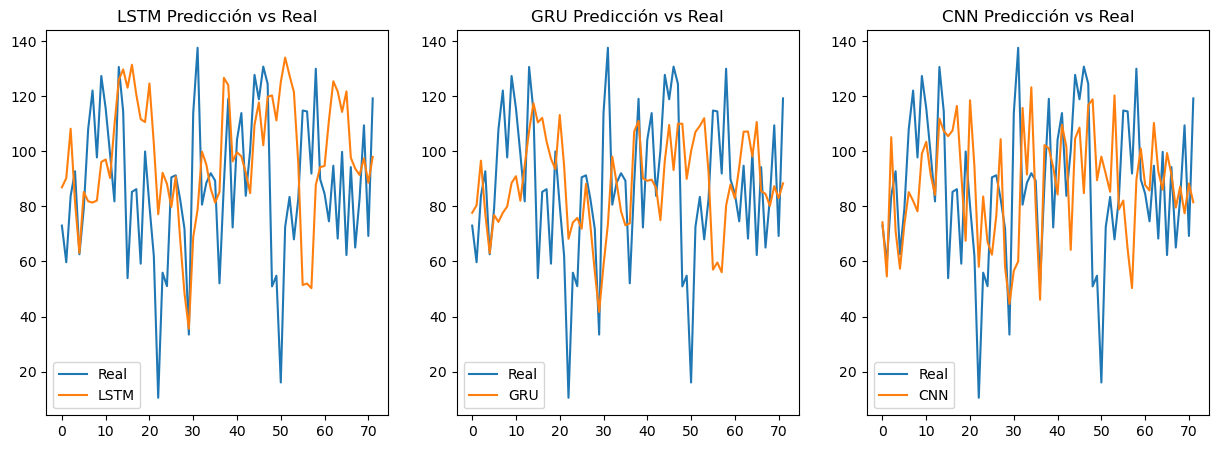

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt

# Cargar los datos
file_path = '../data/Compiled_ABS_2023.csv'  # Reemplaza con la ruta correcta
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Inspeccionar los datos
print(df.head())
print(df.describe())
print(df.info())

# Normalizar la variable 'Total Absent'
scaler = MinMaxScaler(feature_range=(0, 1))
df_normalized = scaler.fit_transform(df[['Total Absent']])

# Convertir de nuevo a DataFrame
df_normalized = pd.DataFrame(df_normalized, index=df.index, columns=['Total Absent'])

# Crear secuencias de datos (ventanas deslizantes)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 7  # Usar los últimos 7 días para predecir el siguiente día
X, y = create_sequences(df_normalized['Total Absent'].values, sequence_length)

# Dividir en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para ser compatible con LSTM/GRU/CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Función para definir y entrenar un modelo LSTM
def train_lstm(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
    return model

# Función para definir y entrenar un modelo GRU
def train_gru(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(GRU(50, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(Dropout(0.2))
    model.add(GRU(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
    return model

# Función para definir y entrenar un modelo CNN 1D
def train_cnn(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
    return model

# Entrenar y evaluar los modelos
lstm_model = train_lstm(X_train, y_train, X_test, y_test)
gru_model = train_gru(X_train, y_train, X_test, y_test)
cnn_model = train_cnn(X_train, y_train, X_test, y_test)

# Hacer predicciones con los modelos
y_pred_lstm = scaler.inverse_transform(lstm_model.predict(X_test))
y_pred_gru = scaler.inverse_transform(gru_model.predict(X_test))
y_pred_cnn = scaler.inverse_transform(cnn_model.predict(X_test))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular el MSE para cada modelo
mse_lstm = mean_squared_error(y_test_rescaled, y_pred_lstm)
mse_gru = mean_squared_error(y_test_rescaled, y_pred_gru)
mse_cnn = mean_squared_error(y_test_rescaled, y_pred_cnn)

print(f'MSE LSTM: {mse_lstm}')
print(f'MSE GRU: {mse_gru}')
print(f'MSE CNN: {mse_cnn}')

# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_lstm, label='LSTM')
plt.title('LSTM Predicción vs Real')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_gru, label='GRU')
plt.title('GRU Predicción vs Real')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_cnn, label='CNN')
plt.title('CNN Predicción vs Real')
plt.legend()

plt.show()

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 348ms/step - loss: 0.2250 - val_loss: 0.0352
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0871 - val_loss: 0.0165
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0383 - val_loss: 0.0242
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0310 - val_loss: 0.0112
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0354 - val_loss: 0.0137
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0339 - val_loss: 0.0196
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0283 - val_loss: 0.0137
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0345 - val_loss: 0.0128
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0281 - val_loss: 0.0182
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0294 - val_loss: 0.0131
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0317 - val_loss: 0.0141
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0286 - val_

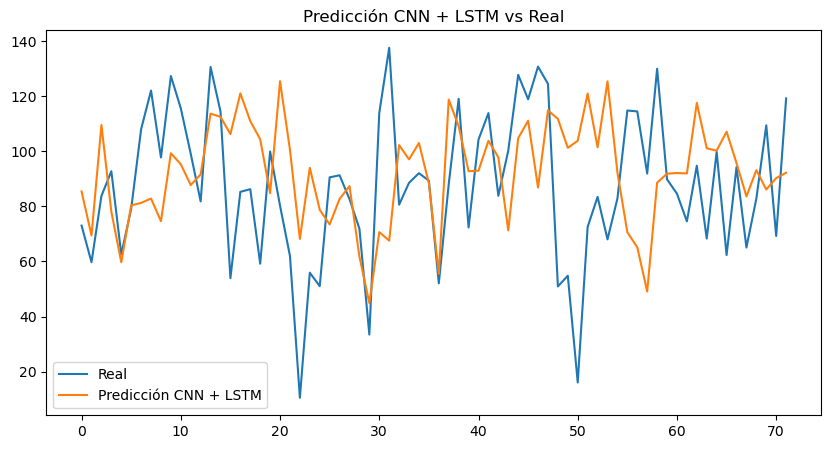

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten

# Definir una arquitectura combinada CNN + LSTM
def train_cnn_lstm(X_train, y_train, X_test, y_test):
    model = Sequential()
    
    # CNN layers
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)))
    model.add(MaxPooling1D(pool_size=2))
    
    # LSTM layers
    model.add(LSTM(50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(1))
    
    # Compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Entrenar el modelo
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
    
    return model

# Entrenar y evaluar el modelo CNN + LSTM
cnn_lstm_model = train_cnn_lstm(X_train, y_train, X_test, y_test)

# Hacer predicciones con el modelo CNN + LSTM
y_pred_cnn_lstm = scaler.inverse_transform(cnn_lstm_model.predict(X_test))

# Calcular el MSE para el modelo CNN + LSTM
mse_cnn_lstm = mean_squared_error(y_test_rescaled, y_pred_cnn_lstm)
print(f'MSE CNN + LSTM: {mse_cnn_lstm}')

# Visualizar las predicciones vs los valores reales para el modelo CNN + LSTM
plt.figure(figsize=(10, 5))
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_cnn_lstm, label='Predicción CNN + LSTM')
plt.title('Predicción CNN + LSTM vs Real')
plt.legend()
plt.show()

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 211ms/step - loss: 0.2070 - val_loss: 0.0155
Epoch 2/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0573 - val_loss: 0.0284
Epoch 3/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0417 - val_loss: 0.0107
Epoch 4/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0320 - val_loss: 0.0205
Epoch 5/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0296 - val_loss: 0.0184
Epoch 6/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0305 - val_loss: 0.0148
Epoch 7/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0268 - val_loss: 0.0158
Epoch 8/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0311 - val_loss: 0.0140
Epoch 9/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0297 - val_loss: 0.0161
Epoch 10/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0284 - val_loss: 0.0139
Epoch 11/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0310 - val_loss: 0.0143
Epoch 12/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/st

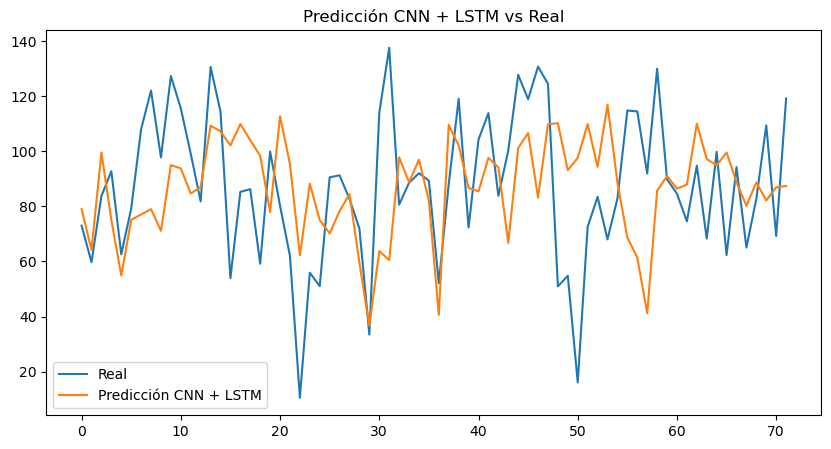

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten

# Definir una arquitectura combinada CNN + LSTM
def train_cnn_lstm(X_train, y_train, X_test, y_test):
    model = Sequential()
    
    # CNN layers
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)))
    model.add(MaxPooling1D(pool_size=2))
    
    # LSTM layers
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(1))
    
    # Compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Entrenar el modelo
    model.fit(X_train, y_train, epochs=150, batch_size=24, validation_data=(X_test, y_test))
    
    return model

# Entrenar y evaluar el modelo CNN + LSTM
cnn_lstm_model = train_cnn_lstm(X_train, y_train, X_test, y_test)

# Hacer predicciones con el modelo CNN + LSTM
y_pred_cnn_lstm = scaler.inverse_transform(cnn_lstm_model.predict(X_test))

# Calcular el MSE para el modelo CNN + LSTM
mse_cnn_lstm = mean_squared_error(y_test_rescaled, y_pred_cnn_lstm)
print(f'MSE CNN + LSTM: {mse_cnn_lstm}')

# Visualizar las predicciones vs los valores reales para el modelo CNN + LSTM
plt.figure(figsize=(10, 5))
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_cnn_lstm, label='Predicción CNN + LSTM')
plt.title('Predicción CNN + LSTM vs Real')
plt.legend()
plt.show()

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 419ms/step - loss: 0.2049 - val_loss: 0.0313
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0791 - val_loss: 0.0217
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0403 - val_loss: 0.0200
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0313 - val_loss: 0.0110
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0355 - val_loss: 0.0144
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0312 - val_loss: 0.0166
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0300 - val_loss: 0.0135
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0300 - val_loss: 0.0155
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0318 - val_loss: 0.0134
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0292 - val_loss: 0.0155
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0292 - val_loss: 0.0142
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0290 - val_

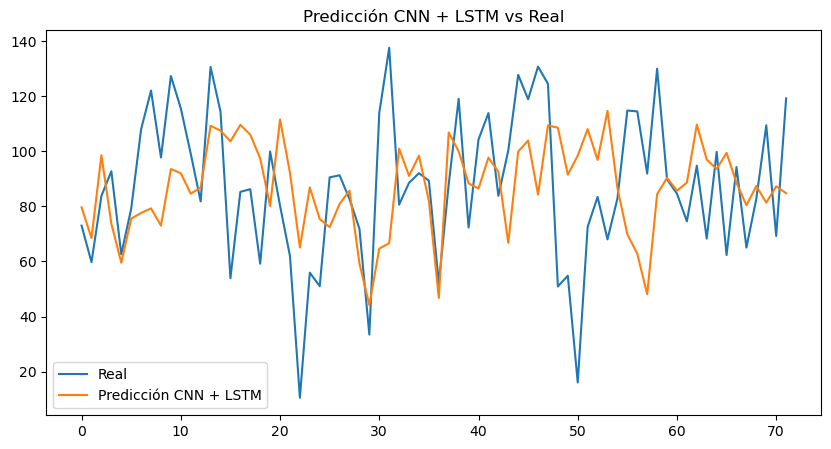

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten

# Definir una arquitectura combinada CNN + LSTM
def train_cnn_lstm(X_train, y_train, X_test, y_test):
    model = Sequential()
    
    # CNN layers
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)))
    model.add(MaxPooling1D(pool_size=2))
    
    # LSTM layers
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(1))
    
    # Compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Entrenar el modelo
    model.fit(X_train, y_train, epochs=200, batch_size=40, validation_data=(X_test, y_test))
    
    return model

# Entrenar y evaluar el modelo CNN + LSTM
cnn_lstm_model = train_cnn_lstm(X_train, y_train, X_test, y_test)

# Hacer predicciones con el modelo CNN + LSTM
y_pred_cnn_lstm = scaler.inverse_transform(cnn_lstm_model.predict(X_test))

# Calcular el MSE para el modelo CNN + LSTM
mse_cnn_lstm = mean_squared_error(y_test_rescaled, y_pred_cnn_lstm)
print(f'MSE CNN + LSTM: {mse_cnn_lstm}')

# Visualizar las predicciones vs los valores reales para el modelo CNN + LSTM
plt.figure(figsize=(10, 5))
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_cnn_lstm, label='Predicción CNN + LSTM')
plt.title('Predicción CNN + LSTM vs Real')
plt.legend()
plt.show()

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 441ms/step - loss: 0.2297 - val_loss: 0.0537
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1345 - val_loss: 0.0162
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0457 - val_loss: 0.0312
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0460 - val_loss: 0.0294
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0352 - val_loss: 0.0114
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0342 - val_loss: 0.0107
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0375 - val_loss: 0.0144
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0312 - val_loss: 0.0209
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0305 - val_loss: 0.0189
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0310 - val_loss: 0.0152
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0293 - val_loss: 0.0140
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0306 - val_

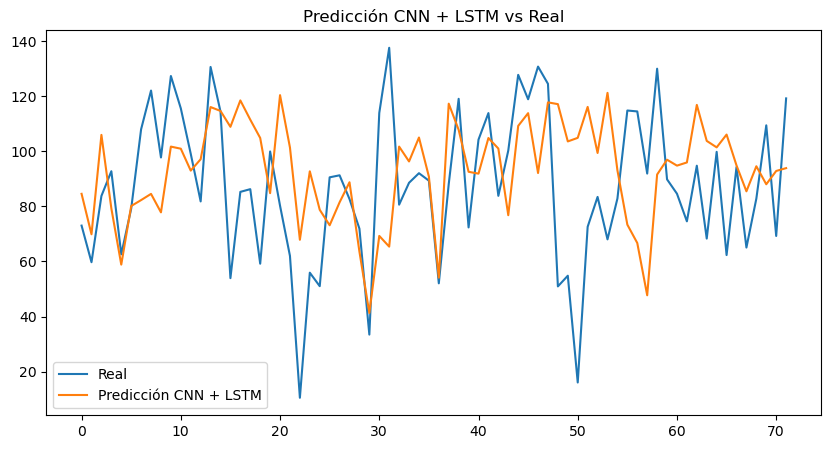

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten

# Definir una arquitectura combinada CNN + LSTM
def train_cnn_lstm(X_train, y_train, X_test, y_test):
    model = Sequential()
    
    # CNN layers
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)))
    model.add(MaxPooling1D(pool_size=2))
    
    # LSTM layers
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(1))
    
    # Compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Entrenar el modelo
    model.fit(X_train, y_train, epochs=200, batch_size=50, validation_data=(X_test, y_test))
    
    return model

# Entrenar y evaluar el modelo CNN + LSTM
cnn_lstm_model = train_cnn_lstm(X_train, y_train, X_test, y_test)

# Hacer predicciones con el modelo CNN + LSTM
y_pred_cnn_lstm = scaler.inverse_transform(cnn_lstm_model.predict(X_test))

# Calcular el MSE para el modelo CNN + LSTM
mse_cnn_lstm = mean_squared_error(y_test_rescaled, y_pred_cnn_lstm)
print(f'MSE CNN + LSTM: {mse_cnn_lstm}')

# Visualizar las predicciones vs los valores reales para el modelo CNN + LSTM
plt.figure(figsize=(10, 5))
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_cnn_lstm, label='Predicción CNN + LSTM')
plt.title('Predicción CNN + LSTM vs Real')
plt.legend()
plt.show()

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 100ms/step - loss: 0.1684 - val_loss: 0.0351
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0346 - val_loss: 0.0179
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0344 - val_loss: 0.0119
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0328 - val_loss: 0.0146
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0285 - val_loss: 0.0118
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0282 - val_loss: 0.0118
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0262 - val_loss: 0.0167
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0286 - val_loss: 0.0268
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0299 - val_loss: 0.0171
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0304 - val_loss: 0.0123
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0289 - val_loss: 0.0121
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/st

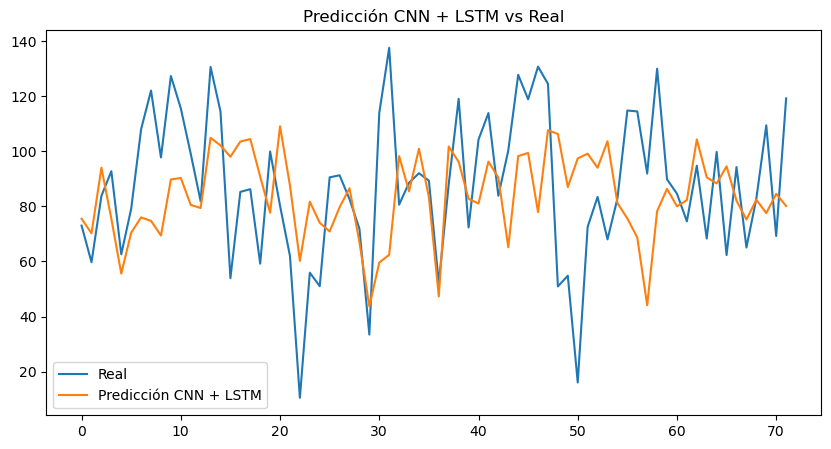

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten

# Definir una arquitectura combinada CNN + LSTM
def train_cnn_lstm(X_train, y_train, X_test, y_test):
    model = Sequential()
    
    # CNN layers
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)))
    model.add(MaxPooling1D(pool_size=2))
    
    # LSTM layers
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(1))
    
    # Compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Entrenar el modelo
    model.fit(X_train, y_train, epochs=200, batch_size=12, validation_data=(X_test, y_test))
    
    return model

# Entrenar y evaluar el modelo CNN + LSTM
cnn_lstm_model = train_cnn_lstm(X_train, y_train, X_test, y_test)

# Hacer predicciones con el modelo CNN + LSTM
y_pred_cnn_lstm = scaler.inverse_transform(cnn_lstm_model.predict(X_test))

# Calcular el MSE para el modelo CNN + LSTM
mse_cnn_lstm = mean_squared_error(y_test_rescaled, y_pred_cnn_lstm)
print(f'MSE CNN + LSTM: {mse_cnn_lstm}')

# Visualizar las predicciones vs los valores reales para el modelo CNN + LSTM
plt.figure(figsize=(10, 5))
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_cnn_lstm, label='Predicción CNN + LSTM')
plt.title('Predicción CNN + LSTM vs Real')
plt.legend()
plt.show()

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - loss: 0.1426 - val_loss: 0.0118
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0314 - val_loss: 0.0106
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0289 - val_loss: 0.0156
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0320 - val_loss: 0.0176
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0356 - val_loss: 0.0141
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0224 - val_loss: 0.0123
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0287 - val_loss: 0.0129
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0259 - val_loss: 0.0197
Epoch 9/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0286 - val_loss: 0.0148
Epoch 10/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0246 - val_loss: 0.0154
Epoch 11/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0266 - val_loss: 0.0139
Epoch 12/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/ste

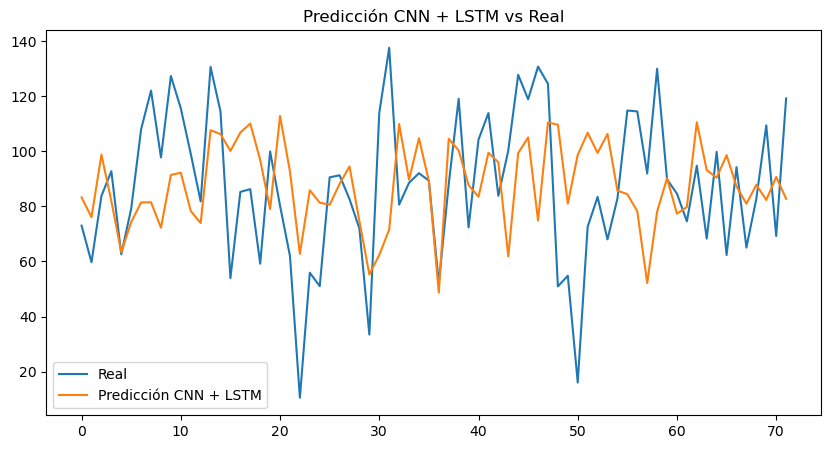

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten

# Definir una arquitectura combinada CNN + LSTM
def train_cnn_lstm(X_train, y_train, X_test, y_test):
    model = Sequential()
    
    # CNN layers
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)))
    model.add(MaxPooling1D(pool_size=2))
    
    # LSTM layers
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(1))
    
    # Compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Entrenar el modelo
    model.fit(X_train, y_train, epochs=200, batch_size=7, validation_data=(X_test, y_test))
    
    return model

# Entrenar y evaluar el modelo CNN + LSTM
cnn_lstm_model = train_cnn_lstm(X_train, y_train, X_test, y_test)

# Hacer predicciones con el modelo CNN + LSTM
y_pred_cnn_lstm = scaler.inverse_transform(cnn_lstm_model.predict(X_test))

# Calcular el MSE para el modelo CNN + LSTM
mse_cnn_lstm = mean_squared_error(y_test_rescaled, y_pred_cnn_lstm)
print(f'MSE CNN + LSTM: {mse_cnn_lstm}')

# Visualizar las predicciones vs los valores reales para el modelo CNN + LSTM
plt.figure(figsize=(10, 5))
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_cnn_lstm, label='Predicción CNN + LSTM')
plt.title('Predicción CNN + LSTM vs Real')
plt.legend()
plt.show()

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - loss: 0.1084 - val_loss: 0.0272 - learning_rate: 0.0010
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0347 - val_loss: 0.0167 - learning_rate: 0.0010
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0305 - val_loss: 0.0120 - learning_rate: 0.0010
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0329 - val_loss: 0.0183 - learning_rate: 0.0010
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0306 - val_loss: 0.0114 - learning_rate: 0.0010
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0296 - val_loss: 0.0125 - learning_rate: 0.0010
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0252 - val_loss: 0.0120 - learning_rate: 0.0010
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0250 - val_loss: 0.0129 - learning_rate: 0.0010
Epoch 9/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0243 - val_loss: 0.0118 - learning_rate: 0.0010
Epoch 10/

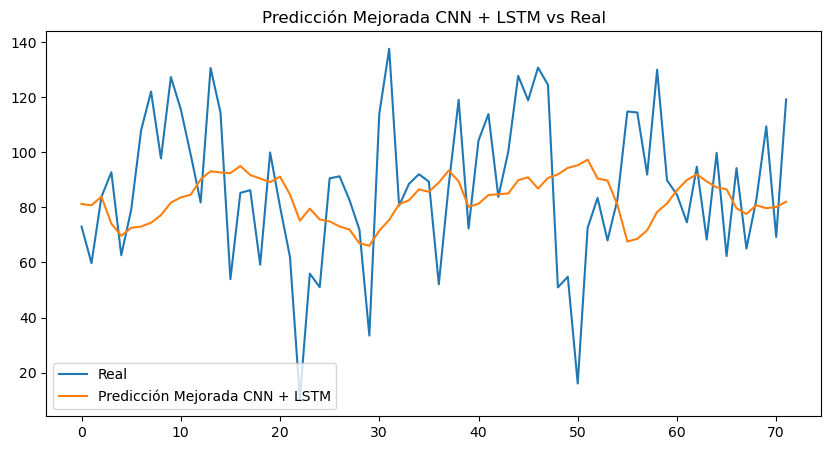

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

def train_improved_cnn_lstm(X_train, y_train, X_test, y_test):
    model = Sequential()
    
    # CNN layers
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)))
    model.add(MaxPooling1D(pool_size=2))
    
    # LSTM layers con unidades adicionales
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(1))
    
    # Compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Callbacks para Early Stopping y ajuste de la tasa de aprendizaje
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

    # Entrenar el modelo
    model.fit(X_train, y_train, epochs=200, batch_size=7, validation_data=(X_test, y_test),
              callbacks=[early_stopping, reduce_lr])
    
    return model

# Entrenar y evaluar el modelo mejorado CNN + LSTM
improved_cnn_lstm_model = train_improved_cnn_lstm(X_train, y_train, X_test, y_test)

# Hacer predicciones con el modelo mejorado CNN + LSTM
y_pred_improved_cnn_lstm = scaler.inverse_transform(improved_cnn_lstm_model.predict(X_test))

# Calcular el MSE para el modelo mejorado CNN + LSTM
mse_improved_cnn_lstm = mean_squared_error(y_test_rescaled, y_pred_improved_cnn_lstm)
print(f'MSE Mejorado CNN + LSTM: {mse_improved_cnn_lstm}')

# Visualizar las predicciones vs los valores reales para el modelo mejorado CNN + LSTM
plt.figure(figsize=(10, 5))
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_improved_cnn_lstm, label='Predicción Mejorada CNN + LSTM')
plt.title('Predicción Mejorada CNN + LSTM vs Real')
plt.legend()
plt.show()

In [ ]:
print (df.head())

            Total Scheduled   Total Absent    Open Time  AUX01 Paid Break  \
Date                                                                        
2023-01-07       2308.166667     72.133333  1065.350000            141.75   
2023-01-08       1418.500000    106.000000  1053.833333             81.75   
2023-01-09       4100.250000    208.466667  2467.933333            242.50   
2023-01-10       4848.916667    161.733333  2255.483333            292.00   
2023-01-11       4835.250000    174.016667  2224.166667            289.75   

            AUX01 Unpaid Lunch  Meeting-Unavail-Paid  Client ACD - Coaching  \
Date                                                                          
2023-01-07                 321                  18.0                   13.0   
2023-01-08                 193                  18.0                   18.5   
2023-01-09                 540                 147.0                   54.0   
2023-01-10                 627                 151.9             

            Total Scheduled   Total Absent    Open Time  AUX01 Paid Break  \
Date                                                                        
2023-01-01       1384.416667    141.166667  1007.333333             76.75   
2023-01-02       4205.000000    204.150000  2694.383333            248.50   
2023-01-03       4653.500000    155.733333  2414.166667            280.50   
2023-01-04       4845.333333    200.166667  2303.616667            289.50   
2023-01-05       4677.250000    194.950000  2368.166667            277.00   

            AUX01 Unpaid Lunch  Meeting-Unavail-Paid  Client ACD - Coaching  \
Date                                                                          
2023-01-01                 197             42.000000                  12.50   
2023-01-02                 553            175.833333                  60.00   
2023-01-03                 610            100.000000                  68.50   
2023-01-04                 628             78.333333             

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - loss: 0.1340 - val_loss: 0.0134 - learning_rate: 0.0010
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0329 - val_loss: 0.0121 - learning_rate: 0.0010
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0333 - val_loss: 0.0146 - learning_rate: 0.0010
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0298 - val_loss: 0.0128 - learning_rate: 0.0010
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0280 - val_loss: 0.0132 - learning_rate: 0.0010
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0270 - val_loss: 0.0160 - learning_rate: 0.0010
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0338 - val_loss: 0.0133 - learning_rate: 0.0010
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0261 - val_loss: 0.0182 - learning_rate: 5.0000e-04
Epoch 9/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0301 - val_loss: 0.0143 - learning_rate: 5.0000e-04
E

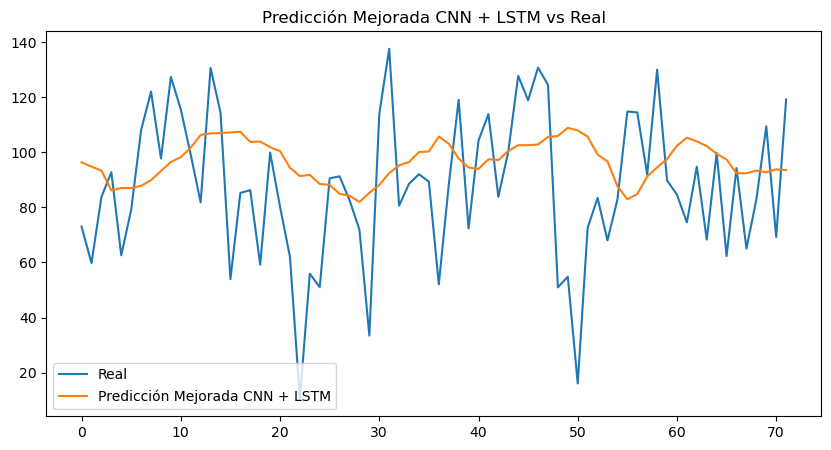

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Cargar los datos
file_path = '../data/Compiled_ABS_2023.csv'  # Reemplaza con la ruta correcta
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Inspeccionar los datos
print(df.head())
print(df.describe())
print(df.info())

# Normalizar la variable 'Total Absent'
scaler = MinMaxScaler(feature_range=(0, 1))
df_normalized = scaler.fit_transform(df[['Total Absent']])

# Convertir de nuevo a DataFrame
df_normalized = pd.DataFrame(df_normalized, index=df.index, columns=['Total Absent'])

# Crear secuencias de datos (ventanas deslizantes)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 7  # Usar los últimos 7 días para predecir el siguiente día
X, y = create_sequences(df_normalized['Total Absent'].values, sequence_length)

# Dividir en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para ser compatible con LSTM/GRU/CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

def train_improved_cnn_lstm(X_train, y_train, X_test, y_test):
    model = Sequential()
    
    # CNN layers
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)))
    model.add(MaxPooling1D(pool_size=2))
    
    # LSTM layers con unidades adicionales
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(1))
    
    # Compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Callbacks para Early Stopping y ajuste de la tasa de aprendizaje
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

    # Entrenar el modelo
    model.fit(X_train, y_train, epochs=200, batch_size=7, validation_data=(X_test, y_test),
              callbacks=[early_stopping, reduce_lr])
    
    return model

# Entrenar y evaluar el modelo mejorado CNN + LSTM
improved_cnn_lstm_model = train_improved_cnn_lstm(X_train, y_train, X_test, y_test)

# Hacer predicciones con el modelo mejorado CNN + LSTM
y_pred_improved_cnn_lstm = scaler.inverse_transform(improved_cnn_lstm_model.predict(X_test))

# Calcular el MSE para el modelo mejorado CNN + LSTM
mse_improved_cnn_lstm = mean_squared_error(y_test_rescaled, y_pred_improved_cnn_lstm)
print(f'MSE Mejorado CNN + LSTM: {mse_improved_cnn_lstm}')

# Visualizar las predicciones vs los valores reales para el modelo mejorado CNN + LSTM
plt.figure(figsize=(10, 5))
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_improved_cnn_lstm, label='Predicción Mejorada CNN + LSTM')
plt.title('Predicción Mejorada CNN + LSTM vs Real')
plt.legend()
plt.show()

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 30s 69ms/step - loss: 0.1228 - val_loss: 0.0170 - learning_rate: 0.0010
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0351 - val_loss: 0.0208 - learning_rate: 0.0010
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0368 - val_loss: 0.0117 - learning_rate: 0.0010
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0280 - val_loss: 0.0116 - learning_rate: 0.0010
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0288 - val_loss: 0.0163 - learning_rate: 0.0010
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0289 - val_loss: 0.0115 - learning_rate: 0.0010
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0261 - val_loss: 0.0137 - learning_rate: 0.0010
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0259 - val_loss: 0.0126 - learning_rate: 0.0010
Epoch 9/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0252 - val_loss: 0.0145 - learning_rate: 0.0010
Epoch 10/

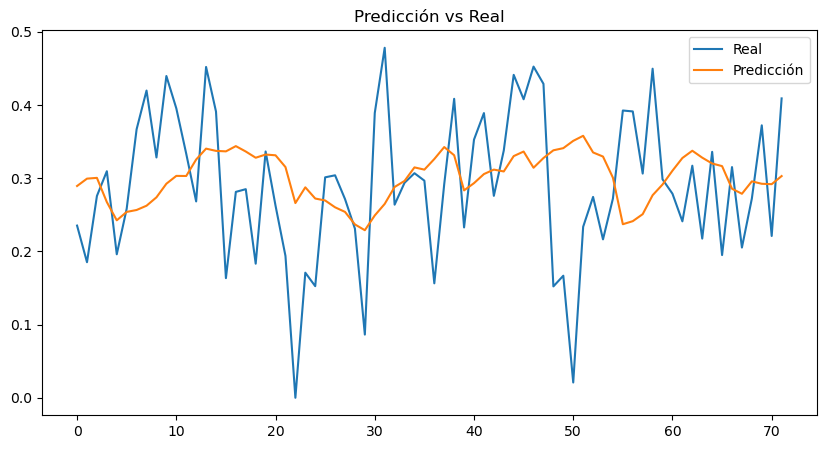

In [ ]:
# Importar librerías adicionales
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday
from pandas.tseries.offsets import CustomBusinessDay
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Cargar los datos
file_path = '../data/Compiled_ABS_2023.csv'  # Reemplaza con la ruta correcta
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Definir días festivos de Nicaragua como un calendario de días festivos
class NicaraguaHolidays(AbstractHolidayCalendar):
    rules = [
        Holiday('New Year', month=1, day=1),
        Holiday('Holy Thursday', month=4, day=9),
        Holiday('Good Friday', month=4, day=10),
        Holiday('Labor Day', month=5, day=1),
        Holiday('Liberation Day', month=7, day=19),
        Holiday('Battle of San Jacinto', month=9, day=14),
        Holiday('Independence Day', month=9, day=15),
        Holiday('Immaculate Conception', month=12, day=8),
        Holiday('Christmas Day', month=12, day=25)
    ]

# Crear un objeto de días festivos para Nicaragua
nicaragua_calendar = CustomBusinessDay(calendar=NicaraguaHolidays())

# Cargar los datos
file_path = '../data/Compiled_ABS_2023.csv'  # Reemplaza con la ruta correcta
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Agregar características temporales al DataFrame
df['Month'] = df.index.month
df['DayOfMonth'] = df.index.day
df['IsHoliday'] = df.index.to_series().apply(lambda x: 1 if nicaragua_calendar.is_on_offset(x) else 0)

# Normalizar la variable 'Total Absent'
scaler = MinMaxScaler(feature_range=(0, 1))
df_normalized = scaler.fit_transform(df[['Total Absent']])

# Convertir de nuevo a DataFrame
df_normalized = pd.DataFrame(df_normalized, index=df.index, columns=['Total Absent'])

# Crear secuencias de datos (ventanas deslizantes)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 7  # Usar los últimos 7 días para predecir el siguiente día
X, y = create_sequences(df_normalized['Total Absent'].values, sequence_length)

# Dividir en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para ser compatible con LSTM/GRU/CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Definir y entrenar el modelo
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Callbacks para Early Stopping y ajuste de la tasa de aprendizaje
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=200, batch_size=7, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, reduce_lr])

# Hacer predicciones con el modelo entrenado
y_pred = model.predict(X_test)

# Calcular el MSE para evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Real')
plt.plot(y_pred, label='Predicción')
plt.title('Predicción vs Real')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MSE: 7405.08822528103


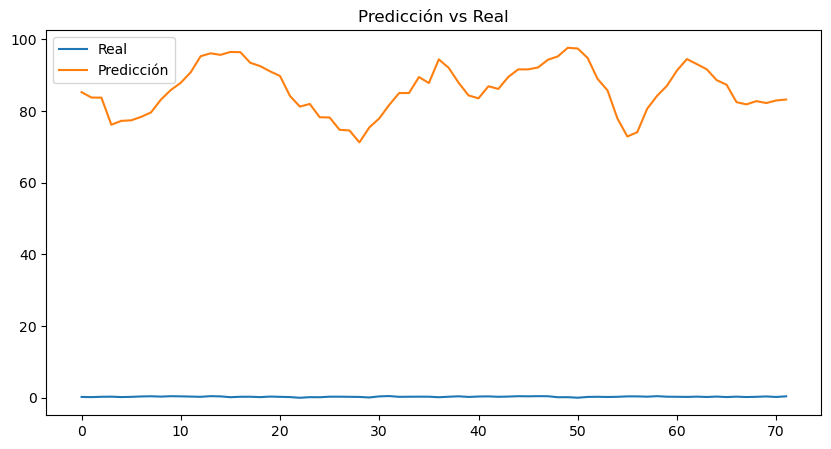

In [ ]:
# Hacer predicciones con el modelo entrenado
y_pred_normalized = model.predict(X_test)

# Invertir la normalización para los valores predichos y los valores de prueba
y_pred = scaler.inverse_transform(y_pred_normalized)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular el MSE para evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_pred)
print(f'MSE: {mse}')

# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Real')
plt.plot(y_pred, label='Predicción')
plt.title('Predicción vs Real')
plt.legend()
plt.show()

Epoch 1/200


c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.1157 - val_loss: 0.0143 - learning_rate: 0.0010
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0313 - val_loss: 0.0146 - learning_rate: 0.0010
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0396 - val_loss: 0.0131 - learning_rate: 0.0010
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0275 - val_loss: 0.0112 - learning_rate: 0.0010
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0335 - val_loss: 0.0112 - learning_rate: 0.0010
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0302 - val_loss: 0.0161 - learning_rate: 0.0010
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0261 - val_loss: 0.0117 - learning_rate: 0.0010
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0244 - val_loss: 0.0156 - learning_rate: 0.0010
Epoch 9/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0258 - val_loss: 0.0129 - learning_rate: 0.0010
Epoch 10/200
41/41 ━━━━━━━━━━━

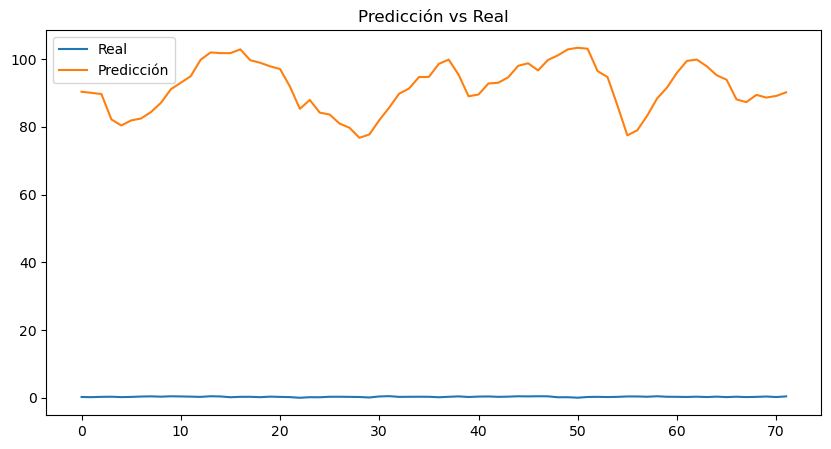

In [ ]:
# Importar librerías adicionales
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday
from pandas.tseries.offsets import CustomBusinessDay
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Cargar los datos
file_path = '../data/Compiled_ABS_2023.csv'  # Reemplaza con la ruta correcta
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Definir días festivos de Nicaragua como un calendario de días festivos
class NicaraguaHolidays(AbstractHolidayCalendar):
    rules = [
        Holiday('New Year', month=1, day=1),
        Holiday('Holy Thursday', month=4, day=9),
        Holiday('Good Friday', month=4, day=10),
        Holiday('Labor Day', month=5, day=1),
        Holiday('Liberation Day', month=7, day=19),
        Holiday('Battle of San Jacinto', month=9, day=14),
        Holiday('Independence Day', month=9, day=15),
        Holiday('Immaculate Conception', month=12, day=8),
        Holiday('Christmas Day', month=12, day=25)
    ]

# Crear un objeto de días festivos para Nicaragua
nicaragua_calendar = CustomBusinessDay(calendar=NicaraguaHolidays())

# Cargar los datos
file_path = '../data/Compiled_ABS_2023.csv'  # Reemplaza con la ruta correcta
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Agregar características temporales al DataFrame
df['Month'] = df.index.month
df['DayOfMonth'] = df.index.day
df['IsHoliday'] = df.index.to_series().apply(lambda x: 1 if nicaragua_calendar.is_on_offset(x) else 0)

# Normalizar la variable 'Total Absent'
scaler = MinMaxScaler(feature_range=(0, 1))
df_normalized = scaler.fit_transform(df[['Total Absent']])

# Convertir de nuevo a DataFrame
df_normalized = pd.DataFrame(df_normalized, index=df.index, columns=['Total Absent'])

# Crear secuencias de datos (ventanas deslizantes)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 7  # Usar los últimos 7 días para predecir el siguiente día
X, y = create_sequences(df_normalized['Total Absent'].values, sequence_length)

# Dividir en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para ser compatible con LSTM/GRU/CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Definir y entrenar el modelo
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Callbacks para Early Stopping y ajuste de la tasa de aprendizaje
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=200, batch_size=7, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, reduce_lr])

# Hacer predicciones con el modelo entrenado
y_pred_normalized = model.predict(X_test)

# Invertir la normalización para los valores predichos y los valores de prueba
y_pred = scaler.inverse_transform(y_pred_normalized)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular el MSE para evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_pred)
print(f'MSE: {mse}')

# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Real')
plt.plot(y_pred, label='Predicción')
plt.title('Predicción vs Real')
plt.legend()
plt.show()

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - loss: 0.1124 - val_loss: 0.0132 - learning_rate: 0.0010
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0346 - val_loss: 0.0140 - learning_rate: 0.0010
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0334 - val_loss: 0.0133 - learning_rate: 0.0010
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0314 - val_loss: 0.0165 - learning_rate: 0.0010
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0276 - val_loss: 0.0110 - learning_rate: 0.0010
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0249 - val_loss: 0.0117 - learning_rate: 0.0010
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0266 - val_loss: 0.0143 - learning_rate: 0.0010
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0245 - val_loss: 0.0117 - learning_rate: 0.0010
Epoch 9/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0324 - val_loss: 0.0122 - learning_rate: 0.0010
Epoch 10/

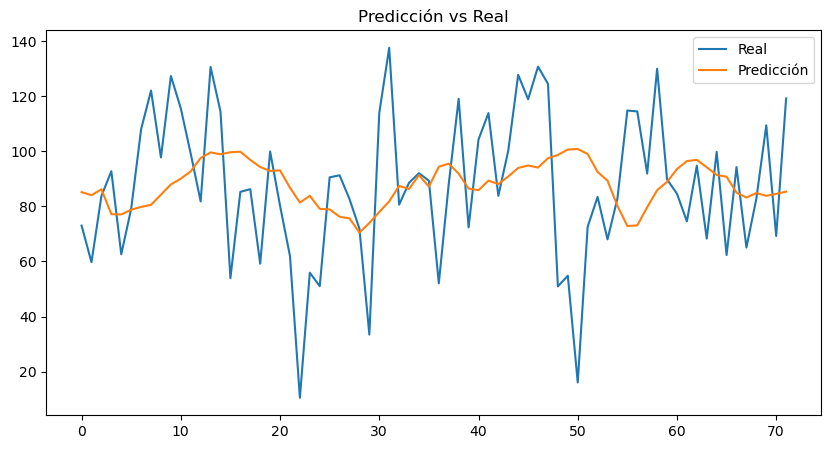

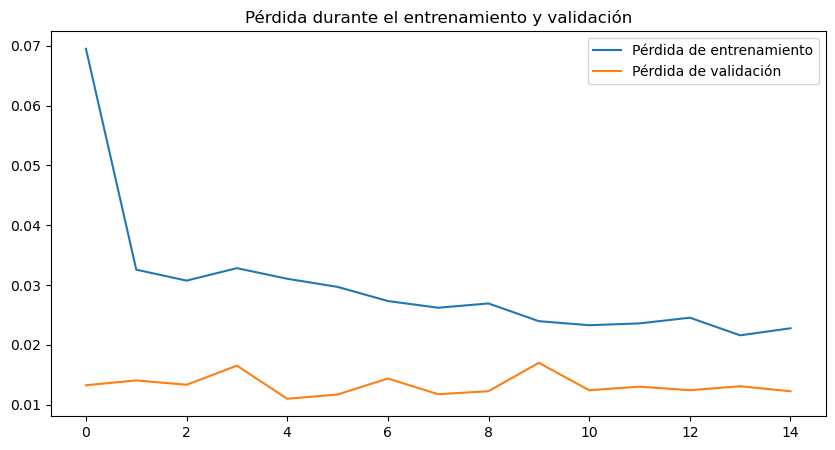

In [ ]:
# Importar librerías adicionales
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday
from pandas.tseries.offsets import CustomBusinessDay
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import holidays  # Nueva librería para gestionar días festivos

# Cargar los datos
file_path = '../data/Compiled_ABS_2023.csv'  # Reemplaza con la ruta correcta
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Definir días festivos de Nicaragua usando la librería holidays
nicaragua_holidays = holidays.Nicaragua()

# Agregar características temporales al DataFrame
df['Month'] = df.index.month
df['DayOfMonth'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
df['IsHoliday'] = df.index.to_series().apply(lambda x: 1 if x in nicaragua_holidays else 0)

# Normalizar la variable 'Total Absent'
scaler = MinMaxScaler(feature_range=(0, 1))
df_normalized = scaler.fit_transform(df[['Total Absent']])

# Convertir de nuevo a DataFrame
df_normalized = pd.DataFrame(df_normalized, index=df.index, columns=['Total Absent'])

# Crear secuencias de datos (ventanas deslizantes)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 7  # Usar los últimos 7 días para predecir el siguiente día
X, y = create_sequences(df_normalized['Total Absent'].values, sequence_length)

# Dividir en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para ser compatible con LSTM/GRU/CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Definir y entrenar el modelo
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Callbacks para Early Stopping y ajuste de la tasa de aprendizaje
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=200, batch_size=7, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, reduce_lr])

# Hacer predicciones con el modelo entrenado
y_pred_normalized = model.predict(X_test)

# Invertir la normalización para los valores predichos y los valores de prueba
y_pred = scaler.inverse_transform(y_pred_normalized)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular el MSE para evaluar el modelo
mse = mean_squared_error(y_test_actual, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_pred)
print(f'MSE: {mse}, RMSE: {rmse}, MAE: {mae}')

# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label='Real')
plt.plot(y_pred, label='Predicción')
plt.title('Predicción vs Real')
plt.legend()
plt.show()

# Visualizar la pérdida durante el entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento y validación')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import holidays

# Cargar los datos
file_path = '../data/Compiled_ABS_2023.csv'  # Reemplaza con la ruta correcta
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Inspeccionar los datos
print(df.head())
print(df.describe())
print(df.info())

# Definir días festivos de Nicaragua usando la librería holidays
nicaragua_holidays = holidays.Nicaragua()

# Agregar características temporales al DataFrame
df['Month'] = df.index.month
df['DayOfMonth'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
df['IsHoliday'] = df.index.to_series().apply(lambda x: 1 if x in nicaragua_holidays else 0)

# Normalizar las variables
scaler = MinMaxScaler(feature_range=(0, 1))
df_normalized = scaler.fit_transform(df[['Total Absent', 'Month', 'DayOfMonth', 'DayOfWeek', 'IsWeekend', 'IsHoliday']])

# Convertir de nuevo a DataFrame
df_normalized = pd.DataFrame(df_normalized, index=df.index, columns=['Total Absent', 'Month', 'DayOfMonth', 'DayOfWeek', 'IsWeekend', 'IsHoliday'])

# Crear secuencias de datos (ventanas deslizantes)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length][0])  # Solo el valor de 'Total Absent' como etiqueta
    return np.array(X), np.array(y)

sequence_length = 7  # Usar los últimos 7 días para predecir el siguiente día
X, y = create_sequences(df_normalized.values, sequence_length)

# Dividir en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para ser compatible con CNN 1D
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Función para definir y entrenar un modelo CNN 1D
def train_cnn(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, X_train.shape[2])))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
    return model

# Entrenar y evaluar el modelo CNN
cnn_model = train_cnn(X_train, y_train, X_test, y_test)

# Hacer predicciones con el modelo
y_pred_cnn = scaler.inverse_transform(np.concatenate((cnn_model.predict(X_test), X_test[:, :, 1:]), axis=1))[:, 0]
y_test_rescaled = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, :, 1:]), axis=1))[:, 0]

# Calcular el MSE para el modelo
mse_cnn = mean_squared_error(y_test_rescaled, y_pred_cnn)

print(f'MSE CNN: {mse_cnn}')

# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(10, 5))
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_cnn, label='CNN')
plt.title('CNN Predicción vs Real')
plt.legend()
plt.show()

            Total Scheduled   Total Absent    Open Time  AUX01 Paid Break  \
Date                                                                        
2023-01-01       1384.416667    141.166667  1007.333333             76.75   
2023-01-02       4205.000000    204.150000  2694.383333            248.50   
2023-01-03       4653.500000    155.733333  2414.166667            280.50   
2023-01-04       4845.333333    200.166667  2303.616667            289.50   
2023-01-05       4677.250000    194.950000  2368.166667            277.00   

            AUX01 Unpaid Lunch  Meeting-Unavail-Paid  Client ACD - Coaching  \
Date                                                                          
2023-01-01                 197             42.000000                  12.50   
2023-01-02                 553            175.833333                  60.00   
2023-01-03                 610            100.000000                  68.50   
2023-01-04                 628             78.333333             

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0873 - val_loss: 0.0340
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0300 - val_loss: 0.0117
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0238 - val_loss: 0.0139
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0177 - val_loss: 0.0141
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0178 - val_loss: 0.0132
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0136 - val_loss: 0.0142
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0128 - val_loss: 0.0132
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0120 - val_loss: 0.0153
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0110 - val_loss: 0.0151
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0110 - val_loss: 0.0153
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0104 - val_loss: 0.0180
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0106 - val_lo

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 3 dimension(s)

            Total Scheduled   Total Absent    Open Time  AUX01 Paid Break  \
Date                                                                        
2023-01-01       1384.416667    141.166667  1007.333333             76.75   
2023-01-02       4205.000000    204.150000  2694.383333            248.50   
2023-01-03       4653.500000    155.733333  2414.166667            280.50   
2023-01-04       4845.333333    200.166667  2303.616667            289.50   
2023-01-05       4677.250000    194.950000  2368.166667            277.00   

            AUX01 Unpaid Lunch  Meeting-Unavail-Paid  Client ACD - Coaching  \
Date                                                                          
2023-01-01                 197             42.000000                  12.50   
2023-01-02                 553            175.833333                  60.00   
2023-01-03                 610            100.000000                  68.50   
2023-01-04                 628             78.333333             

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - loss: 0.1097 - val_loss: 0.1407
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0509 - val_loss: 0.0152
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0278 - val_loss: 0.0154
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0187 - val_loss: 0.0155
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0157 - val_loss: 0.0152
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0141 - val_loss: 0.0120
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0130 - val_loss: 0.0121
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0133 - val_loss: 0.0109
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0131 - val_loss: 0.0113
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0119 - val_loss: 0.0100
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0116 - val_loss: 0.0102
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0101 - val_lo

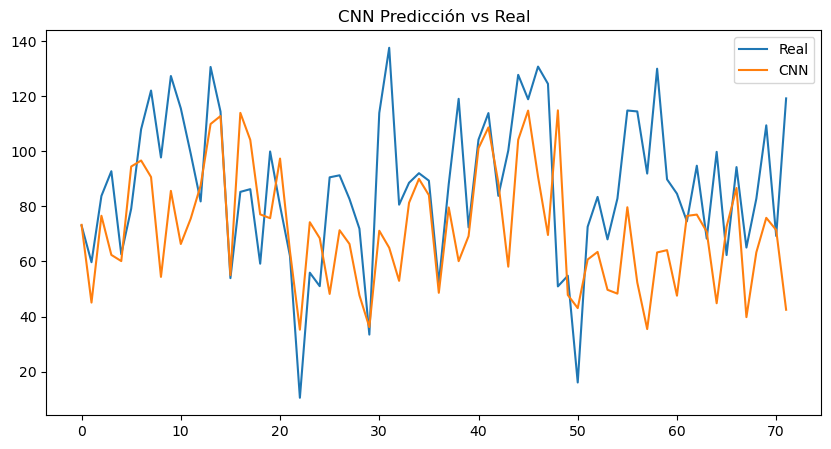

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import holidays

# Cargar los datos
file_path = '../data/Compiled_ABS_2023.csv'  # Reemplaza con la ruta correcta
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Inspeccionar los datos
print(df.head())
print(df.describe())
print(df.info())

# Definir días festivos de Nicaragua usando la librería holidays
nicaragua_holidays = holidays.Nicaragua()

# Agregar características temporales al DataFrame
df['Month'] = df.index.month
df['DayOfMonth'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
df['IsHoliday'] = df.index.to_series().apply(lambda x: 1 if x in nicaragua_holidays else 0)

# Normalizar las variables
scaler = MinMaxScaler(feature_range=(0, 1))
df_normalized = scaler.fit_transform(df[['Total Absent', 'Month', 'DayOfMonth', 'DayOfWeek', 'IsWeekend', 'IsHoliday']])

# Convertir de nuevo a DataFrame
df_normalized = pd.DataFrame(df_normalized, index=df.index, columns=['Total Absent', 'Month', 'DayOfMonth', 'DayOfWeek', 'IsWeekend', 'IsHoliday'])

# Crear secuencias de datos (ventanas deslizantes)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length][0])  # Solo el valor de 'Total Absent' como etiqueta
    return np.array(X), np.array(y)

sequence_length = 7  # Usar los últimos 7 días para predecir el siguiente día
X, y = create_sequences(df_normalized.values, sequence_length)

# Dividir en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para ser compatible con CNN 1D
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Función para definir y entrenar un modelo CNN 1D
def train_cnn(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, X_train.shape[2])))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
    return model

# Entrenar y evaluar el modelo CNN
cnn_model = train_cnn(X_train, y_train, X_test, y_test)

# Hacer predicciones con el modelo
y_pred_cnn = cnn_model.predict(X_test)

# Invertir la normalización solo para las predicciones de 'Total Absent'
y_pred_cnn = scaler.inverse_transform(np.concatenate((y_pred_cnn, np.zeros((y_pred_cnn.shape[0], X_test.shape[2]-1))), axis=1))[:, 0]
y_test_rescaled = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], X_test.shape[2]-1))), axis=1))[:, 0]

# Calcular el MSE para el modelo
mse_cnn = mean_squared_error(y_test_rescaled, y_pred_cnn)

print(f'MSE CNN: {mse_cnn}')

# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(10, 5))
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_cnn, label='CNN')
plt.title('CNN Predicción vs Real')
plt.legend()
plt.show()

            Total Scheduled   Total Absent    Open Time  AUX01 Paid Break  \
Date                                                                        
2023-01-01       1384.416667    141.166667  1007.333333             76.75   
2023-01-02       4205.000000    204.150000  2694.383333            248.50   
2023-01-03       4653.500000    155.733333  2414.166667            280.50   
2023-01-04       4845.333333    200.166667  2303.616667            289.50   
2023-01-05       4677.250000    194.950000  2368.166667            277.00   

            AUX01 Unpaid Lunch  Meeting-Unavail-Paid  Client ACD - Coaching  \
Date                                                                          
2023-01-01                 197             42.000000                  12.50   
2023-01-02                 553            175.833333                  60.00   
2023-01-03                 610            100.000000                  68.50   
2023-01-04                 628             78.333333             

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.1795 - val_loss: 0.0125
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0274 - val_loss: 0.0096
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0174 - val_loss: 0.0092
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0177 - val_loss: 0.0094
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - val_loss: 0.0095
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - val_loss: 0.0107
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0109 - val_loss: 0.0089
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - val_loss: 0.0089
Epoch 9/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0098 - val_loss: 0.0101
Epoch 10/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - val_loss: 0.0098
Epoch 11/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112 - val_loss: 0.0087
Epoch 12/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.

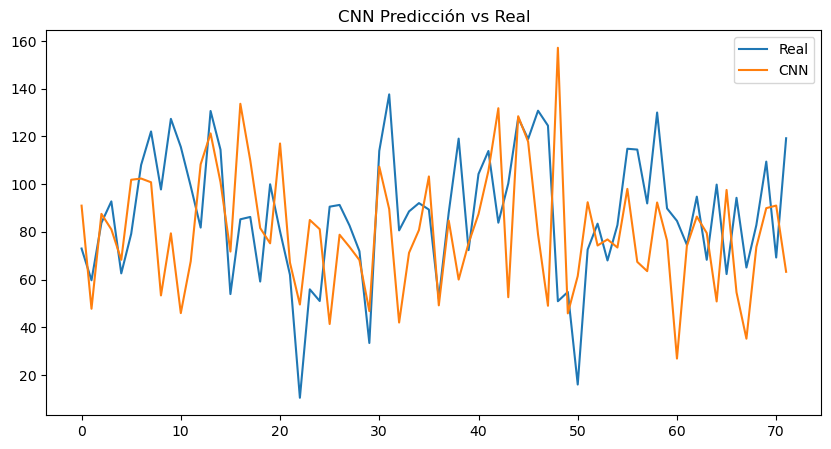

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import holidays

# Cargar los datos
file_path = '../data/Compiled_ABS_2023.csv'  # Reemplaza con la ruta correcta
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Inspeccionar los datos
print(df.head())
print(df.describe())
print(df.info())

# Definir días festivos de Nicaragua usando la librería holidays
nicaragua_holidays = holidays.Nicaragua()

# Agregar características temporales al DataFrame
df['Month'] = df.index.month
df['DayOfMonth'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
df['IsHoliday'] = df.index.to_series().apply(lambda x: 1 if x in nicaragua_holidays else 0)

# Normalizar las variables
scaler = MinMaxScaler(feature_range=(0, 1))
df_normalized = scaler.fit_transform(df[['Total Absent', 'Month', 'DayOfMonth', 'DayOfWeek', 'IsWeekend', 'IsHoliday']])

# Convertir de nuevo a DataFrame
df_normalized = pd.DataFrame(df_normalized, index=df.index, columns=['Total Absent', 'Month', 'DayOfMonth', 'DayOfWeek', 'IsWeekend', 'IsHoliday'])

# Crear secuencias de datos (ventanas deslizantes)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length][0])  # Solo el valor de 'Total Absent' como etiqueta
    return np.array(X), np.array(y)

sequence_length = 7  # Usar los últimos 7 días para predecir el siguiente día
X, y = create_sequences(df_normalized.values, sequence_length)

# Dividir en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para ser compatible con CNN 1D
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Función para definir y entrenar un modelo CNN 1D
def train_cnn(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, X_train.shape[2])))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=200, batch_size=7, validation_data=(X_test, y_test))
    return model

# Entrenar y evaluar el modelo CNN
cnn_model = train_cnn(X_train, y_train, X_test, y_test)

# Hacer predicciones con el modelo
y_pred_cnn = cnn_model.predict(X_test)

# Invertir la normalización solo para las predicciones de 'Total Absent'
y_pred_cnn = scaler.inverse_transform(np.concatenate((y_pred_cnn, np.zeros((y_pred_cnn.shape[0], X_test.shape[2]-1))), axis=1))[:, 0]
y_test_rescaled = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], X_test.shape[2]-1))), axis=1))[:, 0]

# Calcular el MSE para el modelo
mse_cnn = mean_squared_error(y_test_rescaled, y_pred_cnn)

print(f'MSE CNN: {mse_cnn}')

# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(10, 5))
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_cnn, label='CNN')
plt.title('CNN Predicción vs Real')
plt.legend()
plt.show()

            Total Scheduled   Total Absent    Open Time  AUX01 Paid Break  \
Date                                                                        
2023-01-01       1384.416667    141.166667  1007.333333             76.75   
2023-01-02       4205.000000    204.150000  2694.383333            248.50   
2023-01-03       4653.500000    155.733333  2414.166667            280.50   
2023-01-04       4845.333333    200.166667  2303.616667            289.50   
2023-01-05       4677.250000    194.950000  2368.166667            277.00   

            AUX01 Unpaid Lunch  Meeting-Unavail-Paid  Client ACD - Coaching  \
Date                                                                          
2023-01-01                 197             42.000000                  12.50   
2023-01-02                 553            175.833333                  60.00   
2023-01-03                 610            100.000000                  68.50   
2023-01-04                 628             78.333333             

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0742 - val_loss: 0.0146
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0155 - val_loss: 0.0124
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0123 - val_loss: 0.0205
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - val_loss: 0.0108
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0104 - val_loss: 0.0156
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0138 - val_loss: 0.0086
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - val_loss: 0.0092
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - val_loss: 0.0084
Epoch 9/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0105 - val_loss: 0.0133
Epoch 10/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - val_loss: 0.0093
Epoch 11/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - val_loss: 0.0116
Epoch 12/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.

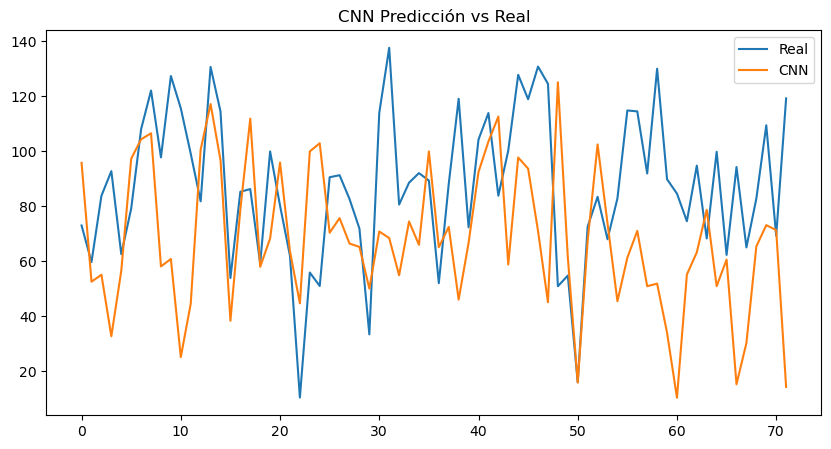

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import holidays

# Cargar los datos
file_path = '../data/Compiled_ABS_2023.csv'  # Reemplaza con la ruta correcta
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Inspeccionar los datos
print(df.head())
print(df.describe())
print(df.info())

# Definir días festivos de Nicaragua usando la librería holidays
nicaragua_holidays = holidays.Nicaragua()

# Agregar características temporales al DataFrame
df['Month'] = df.index.month
df['DayOfMonth'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
df['IsHoliday'] = df.index.to_series().apply(lambda x: 1 if x in nicaragua_holidays else 0)

# Normalizar las variables
scaler = MinMaxScaler(feature_range=(0, 1))
df_normalized = scaler.fit_transform(df[['Total Absent', 'Month', 'DayOfMonth', 'DayOfWeek', 'IsWeekend', 'IsHoliday']])

# Convertir de nuevo a DataFrame
df_normalized = pd.DataFrame(df_normalized, index=df.index, columns=['Total Absent', 'Month', 'DayOfMonth', 'DayOfWeek', 'IsWeekend', 'IsHoliday'])

# Crear secuencias de datos (ventanas deslizantes)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length][0])  # Solo el valor de 'Total Absent' como etiqueta
    return np.array(X), np.array(y)

sequence_length = 7  # Usar los últimos 7 días para predecir el siguiente día
X, y = create_sequences(df_normalized.values, sequence_length)

# Dividir en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para ser compatible con CNN 1D
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Función para definir y entrenar un modelo CNN 1D
def train_cnn(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, X_train.shape[2])))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=200, batch_size=7, validation_data=(X_test, y_test))
    return model

# Entrenar y evaluar el modelo CNN
cnn_model = train_cnn(X_train, y_train, X_test, y_test)

# Hacer predicciones con el modelo
y_pred_cnn = cnn_model.predict(X_test)

# Invertir la normalización solo para las predicciones de 'Total Absent'
y_pred_cnn = scaler.inverse_transform(np.concatenate((y_pred_cnn, np.zeros((y_pred_cnn.shape[0], X_test.shape[2]-1))), axis=1))[:, 0]
y_test_rescaled = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], X_test.shape[2]-1))), axis=1))[:, 0]

# Calcular el MSE para el modelo
mse_cnn = mean_squared_error(y_test_rescaled, y_pred_cnn)

print(f'MSE CNN: {mse_cnn}')

# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(10, 5))
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_cnn, label='CNN')
plt.title('CNN Predicción vs Real')
plt.legend()
plt.show()

            Total Scheduled   Total Absent    Open Time  AUX01 Paid Break  \
Date                                                                        
2023-01-01       1384.416667    141.166667  1007.333333             76.75   
2023-01-02       4205.000000    204.150000  2694.383333            248.50   
2023-01-03       4653.500000    155.733333  2414.166667            280.50   
2023-01-04       4845.333333    200.166667  2303.616667            289.50   
2023-01-05       4677.250000    194.950000  2368.166667            277.00   

            AUX01 Unpaid Lunch  Meeting-Unavail-Paid  Client ACD - Coaching  \
Date                                                                          
2023-01-01                 197             42.000000                  12.50   
2023-01-02                 553            175.833333                  60.00   
2023-01-03                 610            100.000000                  68.50   
2023-01-04                 628             78.333333             

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 220ms/step - loss: 0.2106 - val_loss: 0.0720
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0641 - val_loss: 0.0579
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0393 - val_loss: 0.0093
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0350 - val_loss: 0.0111
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0288 - val_loss: 0.0094
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0303 - val_loss: 0.0149
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0266 - val_loss: 0.0108
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0291 - val_loss: 0.0134
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0242 - val_loss: 0.0122
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0242 - val_loss: 0.0150
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0240 - val_loss: 0.0120
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0261 - val_

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - loss: 0.1296 - val_loss: 0.0830
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0394 - val_loss: 0.0122
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0295 - val_loss: 0.0114
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0212 - val_loss: 0.0122
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0168 - val_loss: 0.0113
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0152 - val_loss: 0.0093
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0144 - val_loss: 0.0101
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0121 - val_loss: 0.0096
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0131 - val_loss: 0.0097
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0109 - val_loss: 0.0091
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0112 - val_loss: 0.0093
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0113 - val_lo

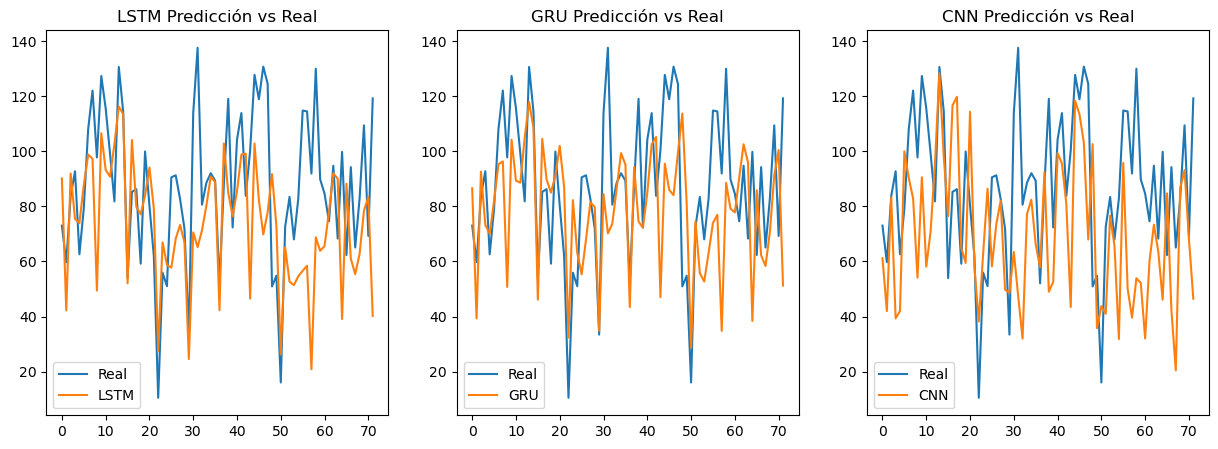

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt
import holidays

# Cargar los datos
file_path = '../data/Compiled_ABS_2023.csv'  # Reemplaza con la ruta correcta
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Inspeccionar los datos
print(df.head())
print(df.describe())
print(df.info())

# Definir días festivos de Nicaragua usando la librería holidays
nicaragua_holidays = holidays.Nicaragua()

# Agregar características temporales al DataFrame
df['Month'] = df.index.month
df['DayOfMonth'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
df['IsHoliday'] = df.index.to_series().apply(lambda x: 1 if x in nicaragua_holidays else 0)

# Normalizar las variables
scaler = MinMaxScaler(feature_range=(0, 1))
df_normalized = scaler.fit_transform(df[['Total Absent', 'Month', 'DayOfMonth', 'DayOfWeek', 'IsWeekend', 'IsHoliday']])

# Convertir de nuevo a DataFrame
df_normalized = pd.DataFrame(df_normalized, index=df.index, columns=['Total Absent', 'Month', 'DayOfMonth', 'DayOfWeek', 'IsWeekend', 'IsHoliday'])

# Crear secuencias de datos (ventanas deslizantes)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length][0])  # Solo el valor de 'Total Absent' como etiqueta
    return np.array(X), np.array(y)

sequence_length = 7  # Usar los últimos 7 días para predecir el siguiente día
X, y = create_sequences(df_normalized.values, sequence_length)

# Dividir en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para ser compatible con LSTM/GRU/CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Función para definir y entrenar un modelo LSTM
def train_lstm(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
    return model

# Función para definir y entrenar un modelo GRU
def train_gru(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(GRU(50, return_sequences=True, input_shape=(sequence_length, X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(GRU(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
    return model

# Función para definir y entrenar un modelo CNN 1D
def train_cnn(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, X_train.shape[2])))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
    return model

# Entrenar y evaluar los modelos
lstm_model = train_lstm(X_train, y_train, X_test, y_test)
gru_model = train_gru(X_train, y_train, X_test, y_test)
cnn_model = train_cnn(X_train, y_train, X_test, y_test)

# Hacer predicciones con los modelos
y_pred_lstm = scaler.inverse_transform(np.concatenate((lstm_model.predict(X_test), np.zeros((len(X_test), 5))), axis=1))[:, 0]
y_pred_gru = scaler.inverse_transform(np.concatenate((gru_model.predict(X_test), np.zeros((len(X_test), 5))), axis=1))[:, 0]
y_pred_cnn = scaler.inverse_transform(np.concatenate((cnn_model.predict(X_test), np.zeros((len(X_test), 5))), axis=1))[:, 0]
y_test_rescaled = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), 5))), axis=1))[:, 0]

# Calcular el MSE para cada modelo
mse_lstm = mean_squared_error(y_test_rescaled, y_pred_lstm)
mse_gru = mean_squared_error(y_test_rescaled, y_pred_gru)
mse_cnn = mean_squared_error(y_test_rescaled, y_pred_cnn)

print(f'MSE LSTM: {mse_lstm}')
print(f'MSE GRU: {mse_gru}')
print(f'MSE CNN: {mse_cnn}')

# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_lstm, label='LSTM')
plt.title('LSTM Predicción vs Real')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_gru, label='GRU')
plt.title('GRU Predicción vs Real')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_cnn, label='CNN')
plt.title('CNN Predicción vs Real')
plt.legend()

plt.show()

            Total Scheduled   Total Absent    Open Time  AUX01 Paid Break  \
Date                                                                        
2023-01-01       1384.416667    141.166667  1007.333333             76.75   
2023-01-02       4205.000000    204.150000  2694.383333            248.50   
2023-01-03       4653.500000    155.733333  2414.166667            280.50   
2023-01-04       4845.333333    200.166667  2303.616667            289.50   
2023-01-05       4677.250000    194.950000  2368.166667            277.00   

            Meeting-Unavail-Paid  Client ACD - Coaching     Absent  \
Date                                                                 
2023-01-01             42.000000                  12.50  79.500000   
2023-01-02            175.833333                  60.00  72.000000   
2023-01-03            100.000000                  68.50   8.000000   
2023-01-04             78.333333                  63.25  31.833333   
2023-01-05            154.500000        

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 209ms/step - loss: 0.1662 - val_loss: 0.1267
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0552 - val_loss: 0.0318
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0388 - val_loss: 0.0102
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0353 - val_loss: 0.0178
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0319 - val_loss: 0.0099
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0288 - val_loss: 0.0109
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0280 - val_loss: 0.0146
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0273 - val_loss: 0.0130
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0261 - val_loss: 0.0131
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0289 - val_loss: 0.0129
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0252 - val_loss: 0.0122
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0266 - val_

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.1648 - val_loss: 0.1701
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0597 - val_loss: 0.0263
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0377 - val_loss: 0.0103
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0260 - val_loss: 0.0153
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0235 - val_loss: 0.0108
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0181 - val_loss: 0.0114
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0177 - val_loss: 0.0150
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0149 - val_loss: 0.0131
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0149 - val_loss: 0.0131
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0122 - val_loss: 0.0136
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0133 - val_loss: 0.0127
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0109 - val_lo

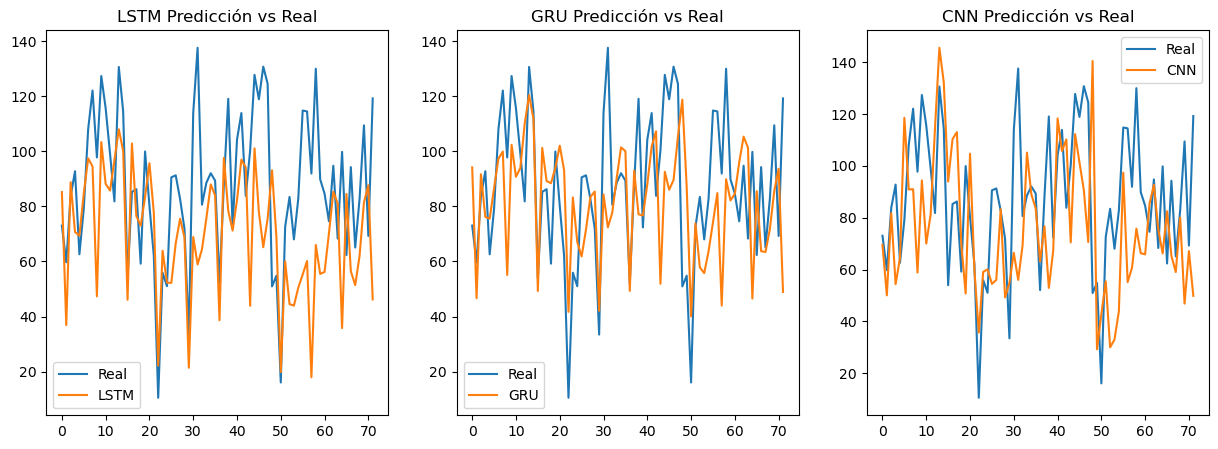

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt
import holidays

# Cargar los datos
file_path = '../data/Compiled_ABS_2023.csv'  # Reemplaza con la ruta correcta
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Inspeccionar los datos
print(df.head())
print(df.describe())
print(df.info())

# Definir días festivos de Nicaragua usando la librería holidays
nicaragua_holidays = holidays.Nicaragua()

# Agregar características temporales al DataFrame
df['Month'] = df.index.month
df['DayOfMonth'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
df['IsHoliday'] = df.index.to_series().apply(lambda x: 1 if x in nicaragua_holidays else 0)

# Normalizar las variables
scaler = MinMaxScaler(feature_range=(0, 1))
df_normalized = scaler.fit_transform(df[['Total Absent', 'Month', 'DayOfMonth', 'DayOfWeek', 'IsWeekend', 'IsHoliday']])

# Convertir de nuevo a DataFrame
df_normalized = pd.DataFrame(df_normalized, index=df.index, columns=['Total Absent', 'Month', 'DayOfMonth', 'DayOfWeek', 'IsWeekend', 'IsHoliday'])

# Crear secuencias de datos (ventanas deslizantes)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length][0])  # Solo el valor de 'Total Absent' como etiqueta
    return np.array(X), np.array(y)

sequence_length = 7  # Usar los últimos 7 días para predecir el siguiente día
X, y = create_sequences(df_normalized.values, sequence_length)

# Dividir en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para ser compatible con LSTM/GRU/CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Función para definir y entrenar un modelo LSTM
def train_lstm(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
    return model

# Función para definir y entrenar un modelo GRU
def train_gru(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(GRU(50, return_sequences=True, input_shape=(sequence_length, X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(GRU(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
    return model

# Función para definir y entrenar un modelo CNN 1D
def train_cnn(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, X_train.shape[2])))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
    return model

# Entrenar y evaluar los modelos
lstm_model = train_lstm(X_train, y_train, X_test, y_test)
gru_model = train_gru(X_train, y_train, X_test, y_test)
cnn_model = train_cnn(X_train, y_train, X_test, y_test)

# Hacer predicciones con los modelos
y_pred_lstm = scaler.inverse_transform(np.concatenate((lstm_model.predict(X_test), np.zeros((len(X_test), 5))), axis=1))[:, 0]
y_pred_gru = scaler.inverse_transform(np.concatenate((gru_model.predict(X_test), np.zeros((len(X_test), 5))), axis=1))[:, 0]
y_pred_cnn = scaler.inverse_transform(np.concatenate((cnn_model.predict(X_test), np.zeros((len(X_test), 5))), axis=1))[:, 0]
y_test_rescaled = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), 5))), axis=1))[:, 0]

# Calcular el MSE para cada modelo
mse_lstm = mean_squared_error(y_test_rescaled, y_pred_lstm)
mse_gru = mean_squared_error(y_test_rescaled, y_pred_gru)
mse_cnn = mean_squared_error(y_test_rescaled, y_pred_cnn)

print(f'MSE LSTM: {mse_lstm}')
print(f'MSE GRU: {mse_gru}')
print(f'MSE CNN: {mse_cnn}')

# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_lstm, label='LSTM')
plt.title('LSTM Predicción vs Real')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_gru, label='GRU')
plt.title('GRU Predicción vs Real')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_cnn, label='CNN')
plt.title('CNN Predicción vs Real')
plt.legend()

plt.show()

            Total Scheduled   Total Absent    Open Time  AUX01 Paid Break  \
Date                                                                        
2023-01-01       1384.416667    141.166667  1007.333333             76.75   
2023-01-02       4205.000000    204.150000  2694.383333            248.50   
2023-01-03       4653.500000    155.733333  2414.166667            280.50   
2023-01-04       4845.333333    200.166667  2303.616667            289.50   
2023-01-05       4677.250000    194.950000  2368.166667            277.00   

            AUX01 Unpaid Lunch  Meeting-Unavail-Paid  Client ACD - Coaching  \
Date                                                                          
2023-01-01                 197             42.000000                  12.50   
2023-01-02                 553            175.833333                  60.00   
2023-01-03                 610            100.000000                  68.50   
2023-01-04                 628             78.333333             

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 212ms/step - loss: 0.2113 - val_loss: 0.0280
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0558 - val_loss: 0.0742
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0383 - val_loss: 0.0103
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0384 - val_loss: 0.0126
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0275 - val_loss: 0.0120
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0294 - val_loss: 0.0127
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0229 - val_loss: 0.0123
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0249 - val_loss: 0.0155
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0291 - val_loss: 0.0124
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0283 - val_loss: 0.0116
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0244 - val_loss: 0.0127
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0212 - val_

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.2130 - val_loss: 0.0877
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0629 - val_loss: 0.0187
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0277 - val_loss: 0.0108
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0265 - val_loss: 0.0096
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0209 - val_loss: 0.0089
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0200 - val_loss: 0.0114
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0177 - val_loss: 0.0091
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0157 - val_loss: 0.0101
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0157 - val_loss: 0.0108
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0142 - val_loss: 0.0104
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0145 - val_loss: 0.0112
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0120 - val_loss: 0.0102
Ep

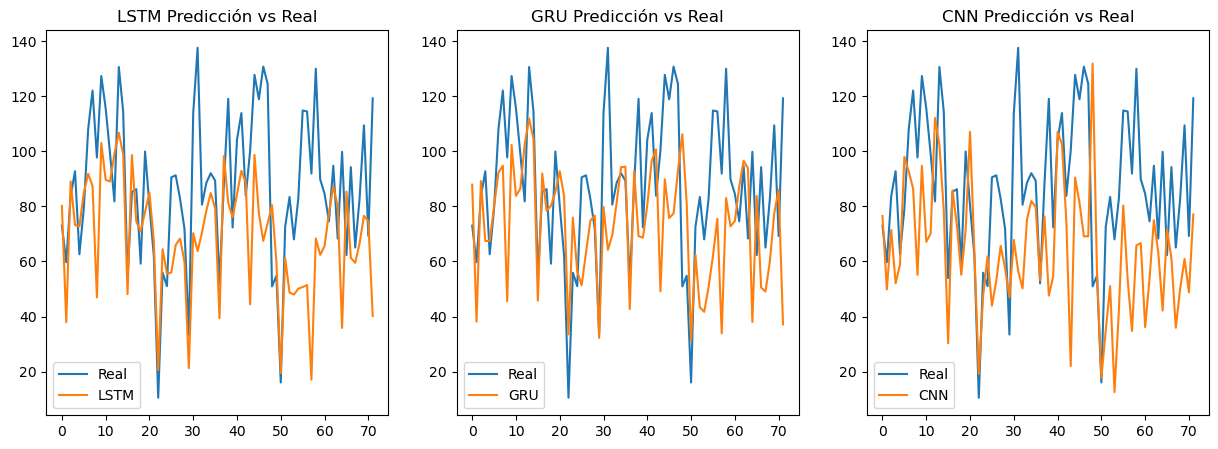

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt
import holidays

# Cargar los datos
file_path = '../data/Compiled_ABS_2023.csv'  # Reemplaza con la ruta correcta
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Inspeccionar los datos
print(df.head())
print(df.describe())
print(df.info())

# Definir días festivos de Nicaragua usando la librería holidays
nicaragua_holidays = holidays.Nicaragua()

# Agregar características temporales al DataFrame
df['Month'] = df.index.month
df['DayOfMonth'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
df['IsHoliday'] = df.index.to_series().apply(lambda x: 1 if x in nicaragua_holidays else 0)

# Normalizar las variables
scaler = MinMaxScaler(feature_range=(0, 1))
df_normalized = scaler.fit_transform(df[['Total Absent', 'Month', 'DayOfMonth', 'DayOfWeek', 'IsWeekend', 'IsHoliday']])

# Convertir de nuevo a DataFrame
df_normalized = pd.DataFrame(df_normalized, index=df.index, columns=['Total Absent', 'Month', 'DayOfMonth', 'DayOfWeek', 'IsWeekend', 'IsHoliday'])

# Crear secuencias de datos (ventanas deslizantes)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length][0])  # Solo el valor de 'Total Absent' como etiqueta
    return np.array(X), np.array(y)

sequence_length = 7  # Usar los últimos 7 días para predecir el siguiente día
X, y = create_sequences(df_normalized.values, sequence_length)

# Dividir en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para ser compatible con LSTM/GRU/CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Función para definir y entrenar un modelo LSTM
def train_lstm(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
    return model

# Función para definir y entrenar un modelo GRU
def train_gru(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(GRU(50, return_sequences=True, input_shape=(sequence_length, X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(GRU(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
    return model

# Función para definir y entrenar un modelo CNN 1D
def train_cnn(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, X_train.shape[2])))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
    return model

# Entrenar y evaluar los modelos
lstm_model = train_lstm(X_train, y_train, X_test, y_test)
gru_model = train_gru(X_train, y_train, X_test, y_test)
cnn_model = train_cnn(X_train, y_train, X_test, y_test)

# Hacer predicciones con los modelos
y_pred_lstm = scaler.inverse_transform(np.concatenate((lstm_model.predict(X_test), np.zeros((len(X_test), 5))), axis=1))[:, 0]
y_pred_gru = scaler.inverse_transform(np.concatenate((gru_model.predict(X_test), np.zeros((len(X_test), 5))), axis=1))[:, 0]
y_pred_cnn = scaler.inverse_transform(np.concatenate((cnn_model.predict(X_test), np.zeros((len(X_test), 5))), axis=1))[:, 0]
y_test_rescaled = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), 5))), axis=1))[:, 0]

# Calcular el MSE para cada modelo
mse_lstm = mean_squared_error(y_test_rescaled, y_pred_lstm)
mse_gru = mean_squared_error(y_test_rescaled, y_pred_gru)
mse_cnn = mean_squared_error(y_test_rescaled, y_pred_cnn)

print(f'MSE LSTM: {mse_lstm}')
print(f'MSE GRU: {mse_gru}')
print(f'MSE CNN: {mse_cnn}')

# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_lstm, label='LSTM')
plt.title('LSTM Predicción vs Real')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_gru, label='GRU')
plt.title('GRU Predicción vs Real')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_cnn, label='CNN')
plt.title('CNN Predicción vs Real')
plt.legend()

plt.show()

Epoch 1/100


c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - loss: 0.2678 - val_loss: 0.1152
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0942 - val_loss: 0.0243
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0699 - val_loss: 0.0236
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0625 - val_loss: 0.0284
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0608 - val_loss: 0.0223
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0598 - val_loss: 0.0227
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0524 - val_loss: 0.0217
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0524 - val_loss: 0.0205
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0557 - val_loss: 0.0190
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0450 - val_loss: 0.0189
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0449 - val_loss: 0.0161
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0390 - val_loss: 0.0143

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.4769 - val_loss: 0.1974
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1034 - val_loss: 0.0181
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0512 - val_loss: 0.0228
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0238 - val_loss: 0.0232
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0158 - val_loss: 0.0111
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0123 - val_loss: 0.0170
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0100 - val_loss: 0.0099
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0082 - val_loss: 0.0129
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0064 - val_loss: 0.0101
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - val_loss: 0.0115
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054 - val_loss: 0.0115
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0048 - val_loss: 0.0109
Epoc

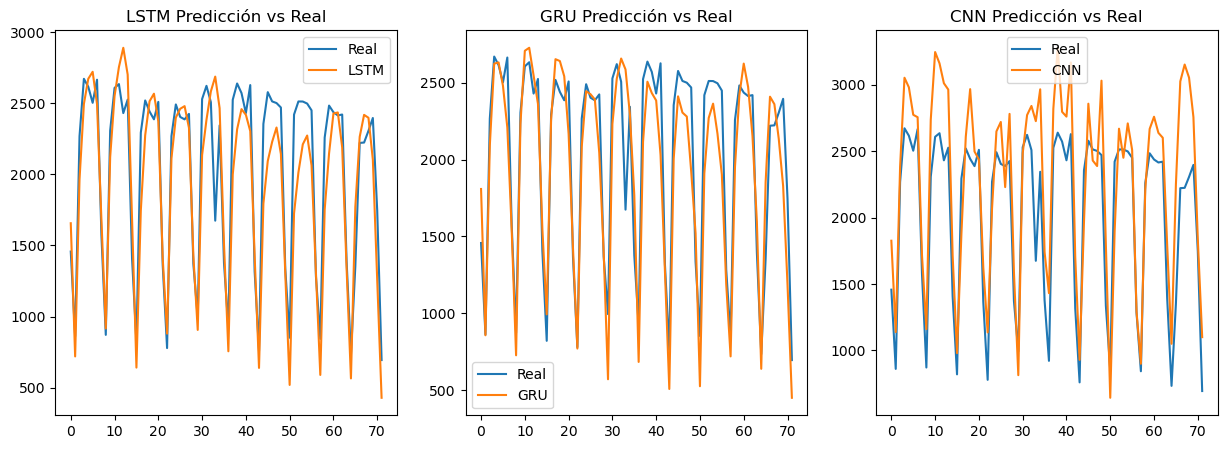

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt
import holidays

# Cargar los datos
file_path = '../data/Compiled_ABS_2023.csv'  # Reemplaza con la ruta correcta
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Definir días festivos de Nicaragua usando la librería holidays
nicaragua_holidays = holidays.Nicaragua()

# Agregar características temporales al DataFrame
df['Month'] = df.index.month
df['DayOfMonth'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
df['IsHoliday'] = df.index.to_series().apply(lambda x: 1 if x in nicaragua_holidays else 0)

# Normalizar todas las columnas
scaler = MinMaxScaler(feature_range=(0, 1))
df_normalized = scaler.fit_transform(df)

# Convertir de nuevo a DataFrame
df_normalized = pd.DataFrame(df_normalized, index=df.index, columns=df.columns)

# Crear secuencias de datos (ventanas deslizantes)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length][0])  # Solo el valor de 'Total Absent' como etiqueta
    return np.array(X), np.array(y)

sequence_length = 7  # Usar los últimos 7 días para predecir el siguiente día
X, y = create_sequences(df_normalized.values, sequence_length)

# Dividir en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para ser compatible con LSTM/GRU/CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Función para definir y entrenar un modelo LSTM
def train_lstm(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
    return model

# Función para definir y entrenar un modelo GRU
def train_gru(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(GRU(50, return_sequences=True, input_shape=(sequence_length, X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(GRU(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
    return model

# Función para definir y entrenar un modelo CNN 1D
def train_cnn(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, X_train.shape[2])))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
    return model

# Entrenar y evaluar los modelos
lstm_model = train_lstm(X_train, y_train, X_test, y_test)
gru_model = train_gru(X_train, y_train, X_test, y_test)
cnn_model = train_cnn(X_train, y_train, X_test, y_test)

# Hacer predicciones con los modelos
y_pred_lstm = scaler.inverse_transform(np.concatenate((lstm_model.predict(X_test), np.zeros((len(X_test), len(df.columns) - 1))), axis=1))[:, 0]
y_pred_gru = scaler.inverse_transform(np.concatenate((gru_model.predict(X_test), np.zeros((len(X_test), len(df.columns) - 1))), axis=1))[:, 0]
y_pred_cnn = scaler.inverse_transform(np.concatenate((cnn_model.predict(X_test), np.zeros((len(X_test), len(df.columns) - 1))), axis=1))[:, 0]
y_test_rescaled = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), len(df.columns) - 1))), axis=1))[:, 0]

# Calcular el MSE para cada modelo
mse_lstm = mean_squared_error(y_test_rescaled, y_pred_lstm)
mse_gru = mean_squared_error(y_test_rescaled, y_pred_gru)
mse_cnn = mean_squared_error(y_test_rescaled, y_pred_cnn)

print(f'MSE LSTM: {mse_lstm}')
print(f'MSE GRU: {mse_gru}')
print(f'MSE CNN: {mse_cnn}')

# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_lstm, label='LSTM')
plt.title('LSTM Predicción vs Real')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_gru, label='GRU')
plt.title('GRU Predicción vs Real')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_cnn, label='CNN')
plt.title('CNN Predicción vs Real')
plt.legend()

plt.show()

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - loss: 0.1822 - val_loss: 0.1082
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0593 - val_loss: 0.0507
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0428 - val_loss: 0.0146
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0335 - val_loss: 0.0157
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0280 - val_loss: 0.0099
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0252 - val_loss: 0.0115
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0238 - val_loss: 0.0127
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0295 - val_loss: 0.0143
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0317 - val_loss: 0.0125
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0270 - val_loss: 0.0136
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0270 - val_loss: 0.0122
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0250 - val_l

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1402 - val_loss: 0.1424
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0606 - val_loss: 0.0116
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0369 - val_loss: 0.0193
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0228 - val_loss: 0.0148
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0173 - val_loss: 0.0134
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0150 - val_loss: 0.0127
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0143 - val_loss: 0.0196
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0152 - val_loss: 0.0135
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0122 - val_loss: 0.0106
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0130 - val_loss: 0.0117
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0135 - val_loss: 0.0138
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0111 - val_loss: 0.

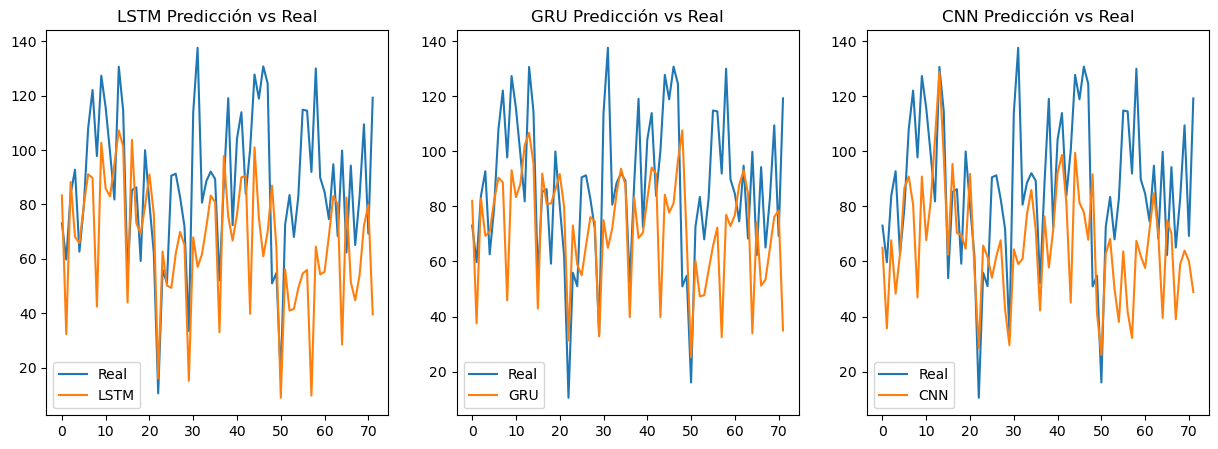

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt
import holidays

# Cargar los datos
file_path = '../data/Compiled_ABS_2023.csv'  # Reemplaza con la ruta correcta
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Definir días festivos de Nicaragua usando la librería holidays
nicaragua_holidays = holidays.Nicaragua()

# Agregar características temporales al DataFrame
df['Month'] = df.index.month
df['DayOfMonth'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
df['IsHoliday'] = df.index.to_series().apply(lambda x: 1 if x in nicaragua_holidays else 0)

# Normalizar las variables
scaler = MinMaxScaler(feature_range=(0, 1))
df_normalized = scaler.fit_transform(df[['Total Absent', 'Month', 'DayOfMonth', 'DayOfWeek', 'IsWeekend', 'IsHoliday']])

# Convertir de nuevo a DataFrame
df_normalized = pd.DataFrame(df_normalized, index=df.index, columns=['Total Absent', 'Month', 'DayOfMonth', 'DayOfWeek', 'IsWeekend', 'IsHoliday'])

# Crear secuencias de datos (ventanas deslizantes)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length][0])  # Solo el valor de 'Total Absent' como etiqueta
    return np.array(X), np.array(y)

sequence_length = 7  # Usar los últimos 7 días para predecir el siguiente día
X, y = create_sequences(df_normalized.values, sequence_length)

# Dividir en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para ser compatible con LSTM/GRU/CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Función para definir y entrenar un modelo LSTM
def train_lstm(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
    return model

# Función para definir y entrenar un modelo GRU
def train_gru(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(GRU(50, return_sequences=True, input_shape=(sequence_length, X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(GRU(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
    return model

# Función para definir y entrenar un modelo CNN 1D
def train_cnn(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, X_train.shape[2])))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
    return model

# Entrenar y evaluar los modelos
lstm_model = train_lstm(X_train, y_train, X_test, y_test)
gru_model = train_gru(X_train, y_train, X_test, y_test)
cnn_model = train_cnn(X_train, y_train, X_test, y_test)

# Hacer predicciones con los modelos
y_pred_lstm = scaler.inverse_transform(np.concatenate((lstm_model.predict(X_test), np.zeros((len(X_test), 5))), axis=1))[:, 0]
y_pred_gru = scaler.inverse_transform(np.concatenate((gru_model.predict(X_test), np.zeros((len(X_test), 5))), axis=1))[:, 0]
y_pred_cnn = scaler.inverse_transform(np.concatenate((cnn_model.predict(X_test), np.zeros((len(X_test), 5))), axis=1))[:, 0]
y_test_rescaled = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), 5))), axis=1))[:, 0]

# Calcular el MSE para cada modelo
mse_lstm = mean_squared_error(y_test_rescaled, y_pred_lstm)
mse_gru = mean_squared_error(y_test_rescaled, y_pred_gru)
mse_cnn = mean_squared_error(y_test_rescaled, y_pred_cnn)

print(f'MSE LSTM: {mse_lstm}')
print(f'MSE GRU: {mse_gru}')
print(f'MSE CNN: {mse_cnn}')

# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_lstm, label='LSTM')
plt.title('LSTM Predicción vs Real')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_gru, label='GRU')
plt.title('GRU Predicción vs Real')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_cnn, label='CNN')
plt.title('CNN Predicción vs Real')
plt.legend()

plt.show()

Epoch 1/100


c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - loss: 3.8703 - val_loss: 0.0123
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - loss: 2.7205 - val_loss: 0.0186
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - loss: 2.2712 - val_loss: 0.0273
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - loss: 2.0733 - val_loss: 0.0413
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - loss: 1.6994 - val_loss: 0.0655
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - loss: 1.3801 - val_loss: 0.0924
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - loss: 1.5789 - val_loss: 0.1166
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - loss: 1.5522 - val_loss: 0.1374
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - loss: 1.4626 - val_loss: 0.1215
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 1.4731 - val_loss: 0.1237
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 1.2304 - val_loss: 0.1800
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - loss: 1.2390 - val_loss

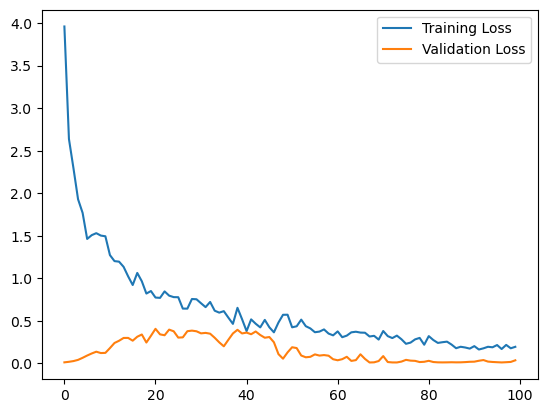

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0314
Test Loss: 0.030759155750274658
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 544ms/step


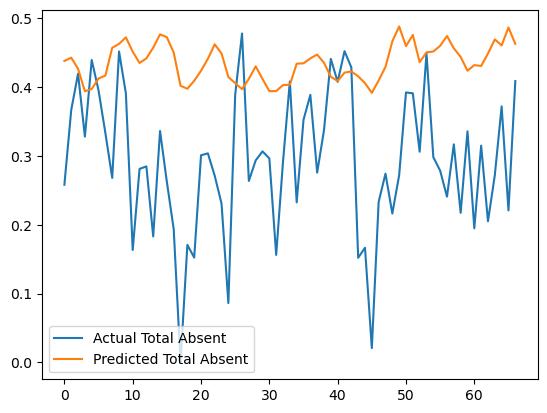

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Cargar y preprocesar los datos
data = pd.read_csv("../data/Compiled_ABS_2023.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.fillna(data.mean(), inplace=True)

# Normalizar los datos
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

# Crear secuencias de datos
def create_sequences(data, target_column, sequence_length=30):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i+sequence_length].values
        label = data.iloc[i+sequence_length][target_column]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

sequence_length = 30
target_column = 'Total Absent'
sequences, targets = create_sequences(scaled_data, target_column, sequence_length)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, shuffle=False)

# Construir el modelo LSTM mejorado
model = Sequential()
model.add(Bidirectional(LSTM(100, return_sequences=True, input_shape=(sequence_length, scaled_data.shape[1]))))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1))

# Compilar el modelo con un optimizador Adam con tasa de aprendizaje adaptativa
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Hacer predicciones
predictions = model.predict(X_test)

# Invertir la normalización para las predicciones y los valores reales
y_test_scaled = y_test.reshape(-1, 1)
predictions_scaled = predictions.reshape(-1, 1)

y_test_inverse = scaler.inverse_transform(np.hstack((np.zeros((y_test_scaled.shape[0], scaled_data.shape[1]-1)), y_test_scaled)))[:, -1]
predictions_inverse = scaler.inverse_transform(np.hstack((np.zeros((predictions_scaled.shape[0], scaled_data.shape[1]-1)), predictions_scaled)))[:, -1]

# Graficar las predicciones versus los valores reales
plt.plot(y_test_inverse, label='Actual Total Absent')
plt.plot(predictions_inverse, label='Predicted Total Absent')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt

# Cargar los datos
file_path = '../data/Compiled_ABS_2023.csv'  # Reemplaza con la ruta correcta
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Inspeccionar los datos
print(df.head())
print(df.describe())
print(df.info())

# Normalizar la variable 'Total Absent'
scaler = MinMaxScaler(feature_range=(0, 1))
df_normalized = scaler.fit_transform(df[['Total Absent']])

# Convertir de nuevo a DataFrame
df_normalized = pd.DataFrame(df_normalized, index=df.index, columns=['Total Absent'])

# Crear secuencias de datos (ventanas deslizantes)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 7  # Usar los últimos 7 días para predecir el siguiente día
X, y = create_sequences(df_normalized['Total Absent'].values, sequence_length)

# Dividir en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para ser compatible con LSTM/GRU/CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Función para definir y entrenar un modelo LSTM
def train_lstm(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=, batch_size=32, validation_data=(X_test, y_test))
    return model

# Función para definir y entrenar un modelo GRU
def train_gru(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(GRU(50, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(Dropout(0.2))
    model.add(GRU(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
    return model

# Función para definir y entrenar un modelo CNN 1D
def train_cnn(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
    return model

# Entrenar y evaluar los modelos
lstm_model = train_lstm(X_train, y_train, X_test, y_test)
gru_model = train_gru(X_train, y_train, X_test, y_test)
cnn_model = train_cnn(X_train, y_train, X_test, y_test)

# Hacer predicciones con los modelos
y_pred_lstm = scaler.inverse_transform(lstm_model.predict(X_test))
y_pred_gru = scaler.inverse_transform(gru_model.predict(X_test))
y_pred_cnn = scaler.inverse_transform(cnn_model.predict(X_test))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular el MSE para cada modelo
mse_lstm = mean_squared_error(y_test_rescaled, y_pred_lstm)
mse_gru = mean_squared_error(y_test_rescaled, y_pred_gru)
mse_cnn = mean_squared_error(y_test_rescaled, y_pred_cnn)

print(f'MSE LSTM: {mse_lstm}')
print(f'MSE GRU: {mse_gru}')
print(f'MSE CNN: {mse_cnn}')

# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_lstm, label='LSTM')
plt.title('LSTM Predicción vs Real')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_gru, label='GRU')
plt.title('GRU Predicción vs Real')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_cnn, label='CNN')
plt.title('CNN Predicción vs Real')
plt.legend()

plt.show()

SyntaxError: invalid syntax (<ipython-input-80-544d4aeb9b5e>, line 56)

            Total Scheduled   Total Absent    Open Time  AUX01 Paid Break  \
Date                                                                        
2023-01-01       1384.416667    141.166667  1007.333333             76.75   
2023-01-02       4205.000000    204.150000  2694.383333            248.50   
2023-01-03       4653.500000    155.733333  2414.166667            280.50   
2023-01-04       4845.333333    200.166667  2303.616667            289.50   
2023-01-05       4677.250000    194.950000  2368.166667            277.00   

            AUX01 Unpaid Lunch  Meeting-Unavail-Paid  Client ACD - Coaching  \
Date                                                                          
2023-01-01                 197             42.000000                  12.50   
2023-01-02                 553            175.833333                  60.00   
2023-01-03                 610            100.000000                  68.50   
2023-01-04                 628             78.333333             

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.1367 - val_loss: 0.0136 - learning_rate: 0.0010
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0347 - val_loss: 0.0121 - learning_rate: 0.0010
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0278 - val_loss: 0.0172 - learning_rate: 0.0010
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0315 - val_loss: 0.0117 - learning_rate: 0.0010
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0290 - val_loss: 0.0118 - learning_rate: 0.0010
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0300 - val_loss: 0.0118 - learning_rate: 0.0010
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0284 - val_loss: 0.0132 - learning_rate: 0.0010
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0263 - val_loss: 0.0125 - learning_rate: 0.0010
Epoch 9/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0257 - val_loss: 0.0117 - learning_rate: 0.0010
Epoch 10/20

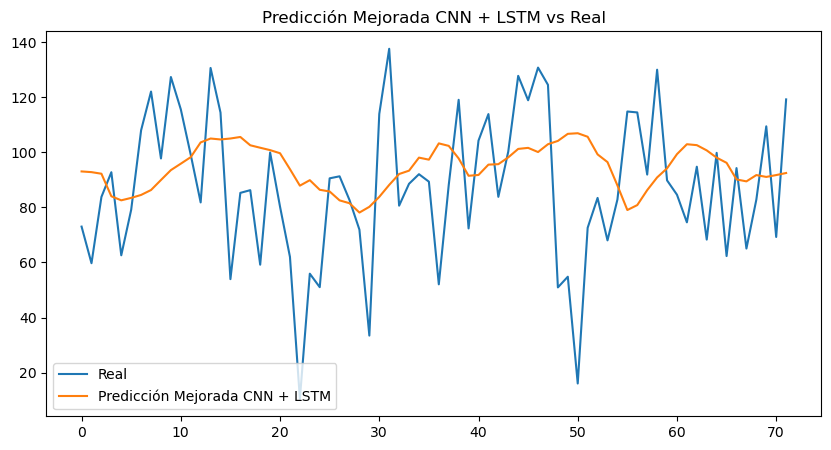

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Cargar los datos
file_path = '../data/Compiled_ABS_2023.csv'  # Reemplaza con la ruta correcta
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Inspeccionar los datos
print(df.head())
print(df.describe())
print(df.info())

# Normalizar la variable 'Total Absent'
scaler = MinMaxScaler(feature_range=(0, 1))
df_normalized = scaler.fit_transform(df[['Total Absent']])

# Convertir de nuevo a DataFrame
df_normalized = pd.DataFrame(df_normalized, index=df.index, columns=['Total Absent'])

# Crear secuencias de datos (ventanas deslizantes)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 7  # Usar los últimos 7 días para predecir el siguiente día
X, y = create_sequences(df_normalized['Total Absent'].values, sequence_length)

# Dividir en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para ser compatible con LSTM/GRU/CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

def train_improved_cnn_lstm(X_train, y_train, X_test, y_test):
    model = Sequential()
    
    # CNN layers
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)))
    model.add(MaxPooling1D(pool_size=2))
    
    # LSTM layers con unidades adicionales
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(1))
    
    # Compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Callbacks para Early Stopping y ajuste de la tasa de aprendizaje
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

    # Entrenar el modelo
    model.fit(X_train, y_train, epochs=200, batch_size=7, validation_data=(X_test, y_test),
              callbacks=[early_stopping, reduce_lr])
    
    return model

# Entrenar y evaluar el modelo mejorado CNN + LSTM
improved_cnn_lstm_model = train_improved_cnn_lstm(X_train, y_train, X_test, y_test)

# Hacer predicciones con el modelo mejorado CNN + LSTM
y_pred_improved_cnn_lstm = scaler.inverse_transform(improved_cnn_lstm_model.predict(X_test))

# Calcular el MSE para el modelo mejorado CNN + LSTM
mse_improved_cnn_lstm = mean_squared_error(y_test_rescaled, y_pred_improved_cnn_lstm)
print(f'MSE Mejorado CNN + LSTM: {mse_improved_cnn_lstm}')

# Visualizar las predicciones vs los valores reales para el modelo mejorado CNN + LSTM
plt.figure(figsize=(10, 5))
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_improved_cnn_lstm, label='Predicción Mejorada CNN + LSTM')
plt.title('Predicción Mejorada CNN + LSTM vs Real')
plt.legend()
plt.show()

            Total Scheduled   Total Absent    Open Time  AUX01 Paid Break  \
Date                                                                        
2023-01-01       1384.416667    141.166667  1007.333333             76.75   
2023-01-02       4205.000000    204.150000  2694.383333            248.50   
2023-01-03       4653.500000    155.733333  2414.166667            280.50   
2023-01-04       4845.333333    200.166667  2303.616667            289.50   
2023-01-05       4677.250000    194.950000  2368.166667            277.00   

            AUX01 Unpaid Lunch  Meeting-Unavail-Paid  Client ACD - Coaching  \
Date                                                                          
2023-01-01                 197             42.000000                  12.50   
2023-01-02                 553            175.833333                  60.00   
2023-01-03                 610            100.000000                  68.50   
2023-01-04                 628             78.333333             

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - loss: 0.2192 - val_loss: 0.0165
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0410 - val_loss: 0.0366
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0459 - val_loss: 0.0115
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0359 - val_loss: 0.0114
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0344 - val_loss: 0.0164
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0303 - val_loss: 0.0142
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0282 - val_loss: 0.0118
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0288 - val_loss: 0.0143
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0299 - val_loss: 0.0141
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0258 - val_loss: 0.0118
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0287 - val_loss: 0.0130
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0293 - val_loss: 0.0122


c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2157 - val_loss: 0.0106
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0337 - val_loss: 0.0196
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0354 - val_loss: 0.0109
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0280 - val_loss: 0.0109
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0290 - val_loss: 0.0105
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0260 - val_loss: 0.0115
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0267 - val_loss: 0.0105
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0280 - val_loss: 0.0105
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0224 - val_loss: 0.0107
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0260 - val_loss: 0.0106
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0254 - val_loss: 0.0107
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0234 - val_loss: 0.0105
Epoch 13/100

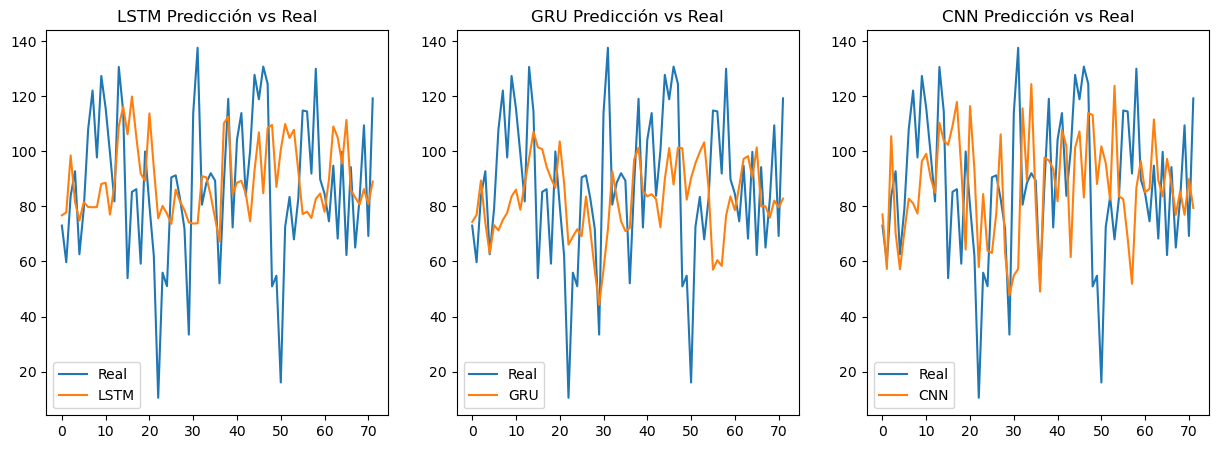

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt

# Cargar los datos
file_path = '../data/Compiled_ABS_2023.csv'  # Reemplaza con la ruta correcta
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Inspeccionar los datos
print(df.head())
print(df.describe())
print(df.info())

# Normalizar la variable 'Total Absent'
scaler = MinMaxScaler(feature_range=(0, 1))
df_normalized = scaler.fit_transform(df[['Total Absent']])

# Convertir de nuevo a DataFrame
df_normalized = pd.DataFrame(df_normalized, index=df.index, columns=['Total Absent'])

# Crear secuencias de datos (ventanas deslizantes)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 7  # Usar los últimos 7 días para predecir el siguiente día
X, y = create_sequences(df_normalized['Total Absent'].values, sequence_length)

# Dividir en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para ser compatible con LSTM/GRU/CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Función para definir y entrenar un modelo LSTM
def train_lstm(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))
    return model

# Función para definir y entrenar un modelo GRU
def train_gru(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(GRU(50, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(Dropout(0.2))
    model.add(GRU(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
    return model

# Función para definir y entrenar un modelo CNN 1D
def train_cnn(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
    return model

# Entrenar y evaluar los modelos
lstm_model = train_lstm(X_train, y_train, X_test, y_test)
gru_model = train_gru(X_train, y_train, X_test, y_test)
cnn_model = train_cnn(X_train, y_train, X_test, y_test)

# Hacer predicciones con los modelos
y_pred_lstm = scaler.inverse_transform(lstm_model.predict(X_test))
y_pred_gru = scaler.inverse_transform(gru_model.predict(X_test))
y_pred_cnn = scaler.inverse_transform(cnn_model.predict(X_test))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular el MSE para cada modelo
mse_lstm = mean_squared_error(y_test_rescaled, y_pred_lstm)
mse_gru = mean_squared_error(y_test_rescaled, y_pred_gru)
mse_cnn = mean_squared_error(y_test_rescaled, y_pred_cnn)

print(f'MSE LSTM: {mse_lstm}')
print(f'MSE GRU: {mse_gru}')
print(f'MSE CNN: {mse_cnn}')

# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_lstm, label='LSTM')
plt.title('LSTM Predicción vs Real')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_gru, label='GRU')
plt.title('GRU Predicción vs Real')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_cnn, label='CNN')
plt.title('CNN Predicción vs Real')
plt.legend()

plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import keras_tuner as kt
from sklearn.metrics import mean_squared_error

# Cargar los datos
file_path = '../data/Compiled_ABS_2023.csv'
data = pd.read_csv(file_path)

# Eliminar espacios adicionales de los nombres de las columnas
data.columns = data.columns.str.strip()

def create_sequences(data, target, sequence_length=10):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(target[i+sequence_length])
    return np.array(X), np.array(y)

# Crear nuevas características
data['Scheduled_to_Open_Ratio'] = data['Total Scheduled'] / (data['Open Time'] + 1e-5)
data['Paid_Break_to_Total_Scheduled_Ratio'] = data['AUX01 Paid Break'] / (data['Total Scheduled'] + 1e-5)
data['Unpaid_Lunch_to_Total_Scheduled_Ratio'] = data['AUX01 Unpaid Lunch'] / (data['Total Scheduled'] + 1e-5)

# Seleccionar las características y la variable objetivo nuevamente
features = data.drop(['Date', 'Total Absent'], axis=1)
target = data['Total Absent']

# Normalizar las características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Crear secuencias
sequence_length = 20  # Ajustar el tamaño de la secuencia según sea necesario
X, y = create_sequences(features_scaled, target.values, sequence_length)

# Dividir los datos en conjuntos de entrenamiento y prueba
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Definir la función de construcción del modelo para KerasTuner
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units_1', min_value=50, max_value=200, step=50), activation='relu', input_shape=(sequence_length, X_train.shape[2]), return_sequences=True))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units_2', min_value=50, max_value=200, step=50), activation='relu', return_sequences=True))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units_3', min_value=50, max_value=200, step=50), activation='relu'))
    model.add(Dropout(hp.Float('dropout_3', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)), loss='mse')
    return model

# Definir el tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='LSTM_hyperparameter_tuning'
)

# Detener el entrenamiento temprano si no hay mejora en 5 épocas
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Buscar los mejores hiperparámetros
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Obtener el mejor modelo
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluar el mejor modelo en el conjunto de prueba
y_test_pred = best_model.predict(X_test)
test_loss = mean_squared_error(y_test, y_test_pred)

print(f'Test MSE: {test_loss}')

Trial 10 Complete [00h 00m 20s]
val_loss: 858.9402465820312

Best val_loss So Far: 607.3120727539062
Total elapsed time: 00h 04m 30s


c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step
Test MSE: 1275.1087914332988


c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.1523 - val_loss: 0.0196
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0351 - val_loss: 0.0173
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0323 - val_loss: 0.0139
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0312 - val_loss: 0.0120
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0268 - val_loss: 0.0119
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0314 - val_loss: 0.0149
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0257 - val_loss: 0.0135
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0318 - val_loss: 0.0125
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0292 - val_loss: 0.0116
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0364 - val_loss: 0.0159
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0271 - val_loss: 0.0124
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss:

c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0968 - val_loss: 0.0149
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0290 - val_loss: 0.0108
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0254 - val_loss: 0.0109
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0258 - val_loss: 0.0110
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0207 - val_loss: 0.0108
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0232 - val_loss: 0.0111
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - val_loss: 0.0133
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0203 - val_loss: 0.0130
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0221 - val_loss: 0.0115
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0196 - val_loss: 0.0128
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0195 - val_loss: 0.0116
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0183 - val_l

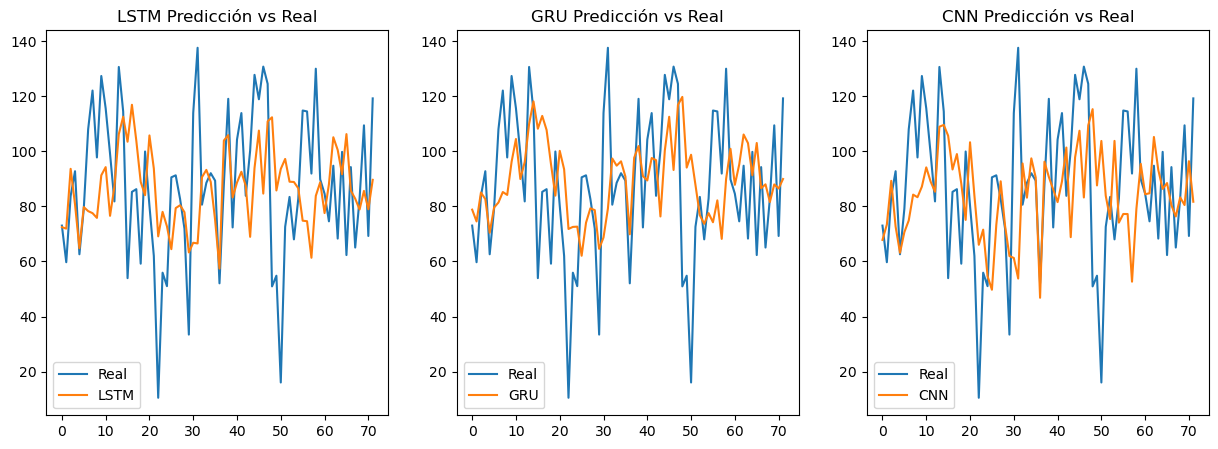

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt

# Cargar los datos
file_path = '../data/Compiled_ABS_2023.csv'  # Reemplaza con la ruta correcta
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Normalizar la variable 'Total Absent'
scaler = MinMaxScaler(feature_range=(0, 1))
df_normalized = scaler.fit_transform(df[['Total Absent']])

# Convertir de nuevo a DataFrame
df_normalized = pd.DataFrame(df_normalized, index=df.index, columns=['Total Absent'])

# Crear secuencias de datos (ventanas deslizantes)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 7  # Usar los últimos 7 días para predecir el siguiente día
X, y = create_sequences(df_normalized['Total Absent'].values, sequence_length)

# Dividir en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para ser compatible con LSTM/GRU/CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Función para definir y entrenar un modelo LSTM
def train_lstm(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=200, batch_size=15, validation_data=(X_test, y_test))
    return model

# Función para definir y entrenar un modelo GRU
def train_gru(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(GRU(128, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(Dropout(0.3))
    model.add(GRU(64, return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=200, batch_size=15, validation_data=(X_test, y_test))
    return model

# Función para definir y entrenar un modelo CNN 1D
def train_cnn(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=200, batch_size=15, validation_data=(X_test, y_test))
    return model

# Entrenar y evaluar los modelos
lstm_model = train_lstm(X_train, y_train, X_test, y_test)
gru_model = train_gru(X_train, y_train, X_test, y_test)
cnn_model = train_cnn(X_train, y_train, X_test, y_test)

# Hacer predicciones con los modelos
y_pred_lstm = scaler.inverse_transform(lstm_model.predict(X_test))
y_pred_gru = scaler.inverse_transform(gru_model.predict(X_test))
y_pred_cnn = scaler.inverse_transform(cnn_model.predict(X_test))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular el MSE para cada modelo
mse_lstm = mean_squared_error(y_test_rescaled, y_pred_lstm)
mse_gru = mean_squared_error(y_test_rescaled, y_pred_gru)
mse_cnn = mean_squared_error(y_test_rescaled, y_pred_cnn)

print(f'MSE LSTM: {mse_lstm}')
print(f'MSE GRU: {mse_gru}')
print(f'MSE CNN: {mse_cnn}')

# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_lstm, label='LSTM')
plt.title('LSTM Predicción vs Real')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_gru, label='GRU')
plt.title('GRU Predicción vs Real')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_cnn, label='CNN')
plt.title('CNN Predicción vs Real')
plt.legend()

plt.show()